# Bayesian optimization of a time-consuming simulator

O. Roustant, INSA Toulouse

The aim of the lab is to optimize a time-consuming simulator using the Efficient Global Optimization (EGO) method. As a toy example, the simulator chosen here mimics a catapult. There are 4 input variables, tuning the catapult, and 1 output, giving the distance of the projectile mark to the catapult. We want to find the value(s) of the input variable(s) maximizing that distance. Notice that the simulator is not time-consuming. However, for the sake of realism, we will limit the computational budget to 36 runs.

## "By-hand" Optimization
<br> We provide here a shiny application created by Nicolas Durrande, which allows using the simulator interactively. Alternatively, you can use the web application, available here : https://durrande.shinyapps.io/catapult/

In [ ]:
library(shiny)
# runApp()

*Question: By playing with the simulator, propose a set of input values giving the largest possible value of the output. Here we consider the noise-free case, by fixing the wind to zero.*

To continue running the notebook, you may need to interrupt the kernel (square symbol!). Then load the two following scripts, containing useful functions. 

In [1]:
source("catapultSettings.R")
source("catapultFunctions.R")

## Design of experiments
Let us create an initial design of experiments and compute the corresponding values.

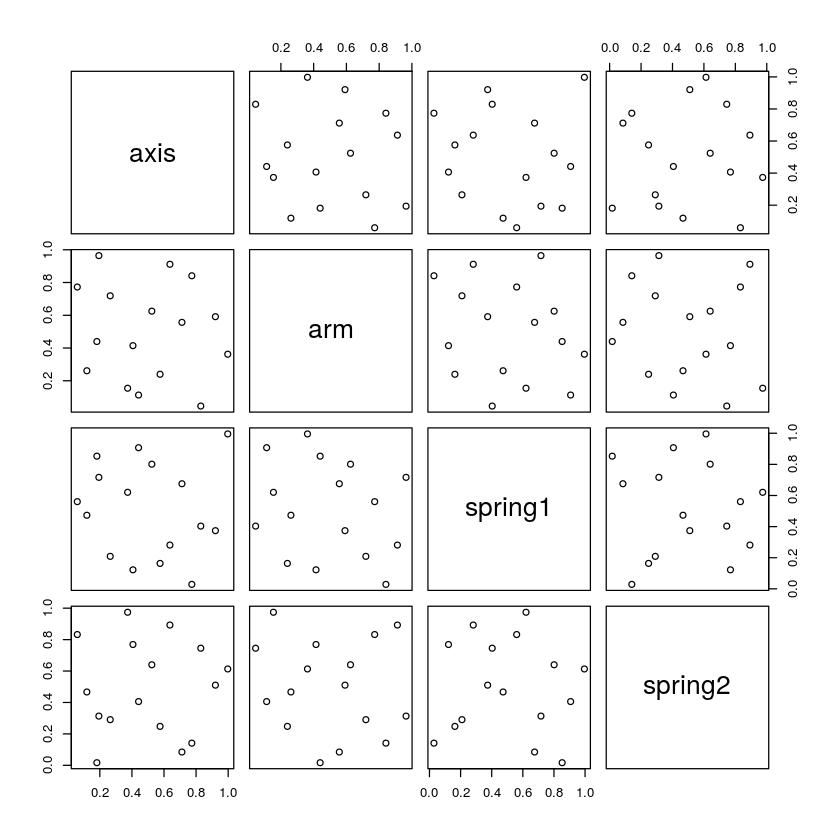

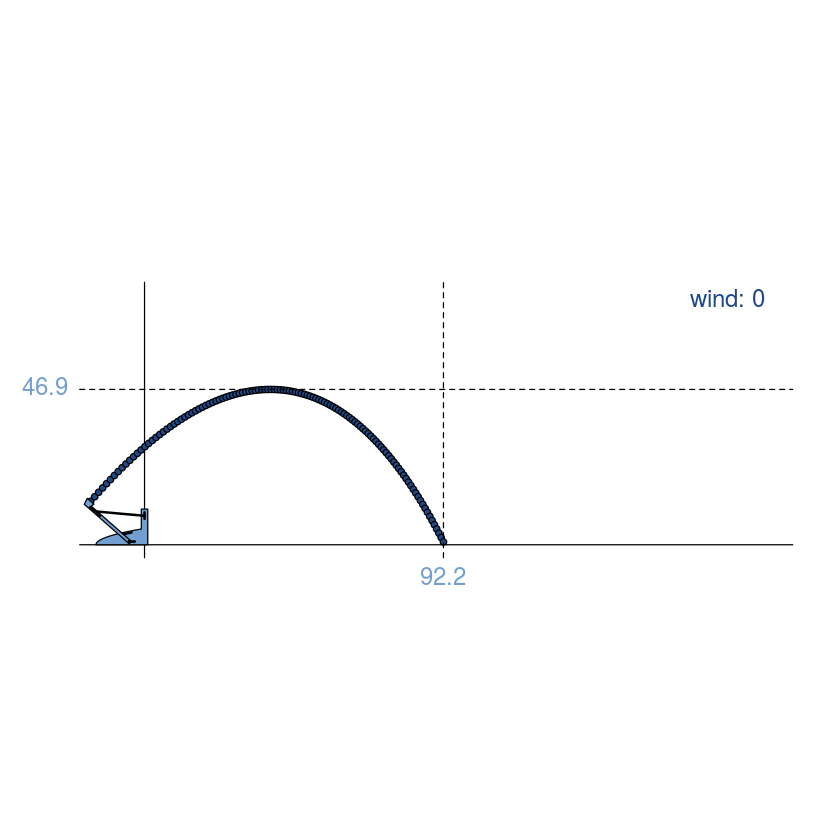

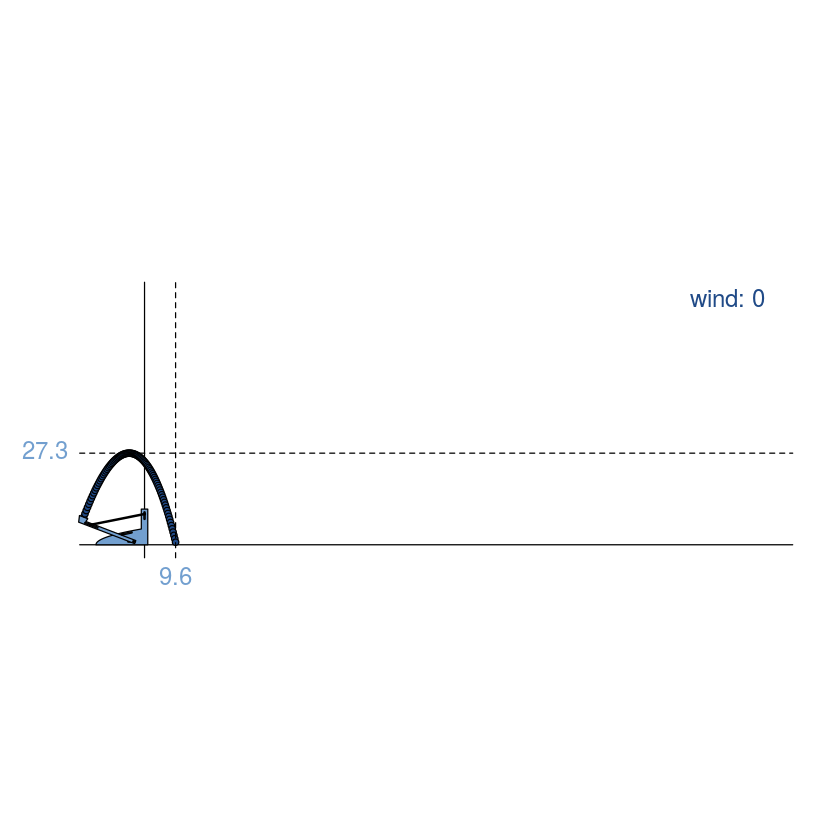

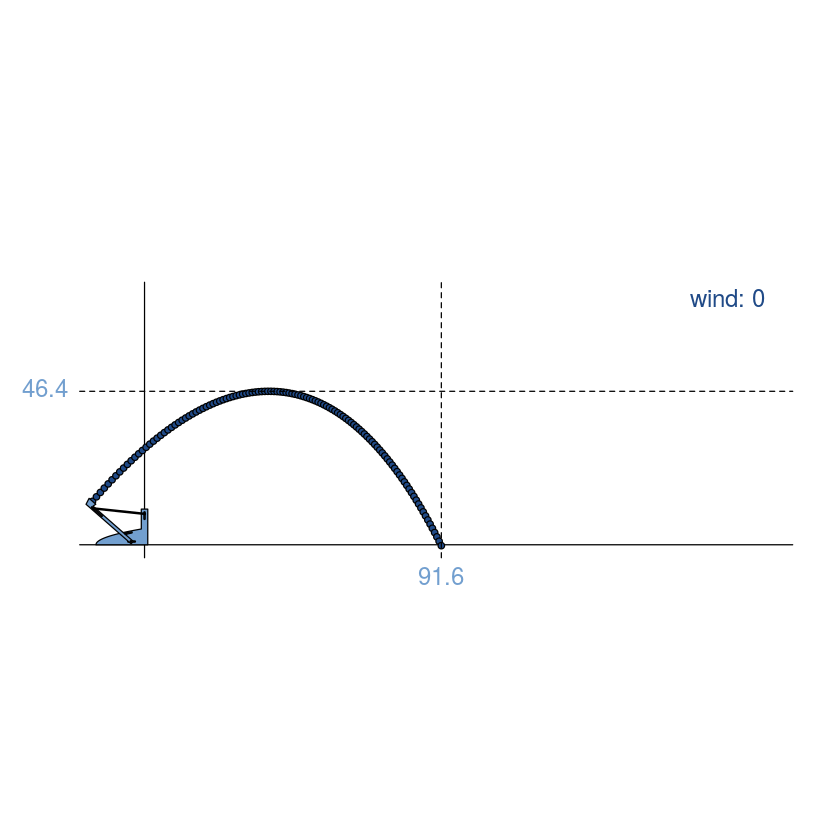

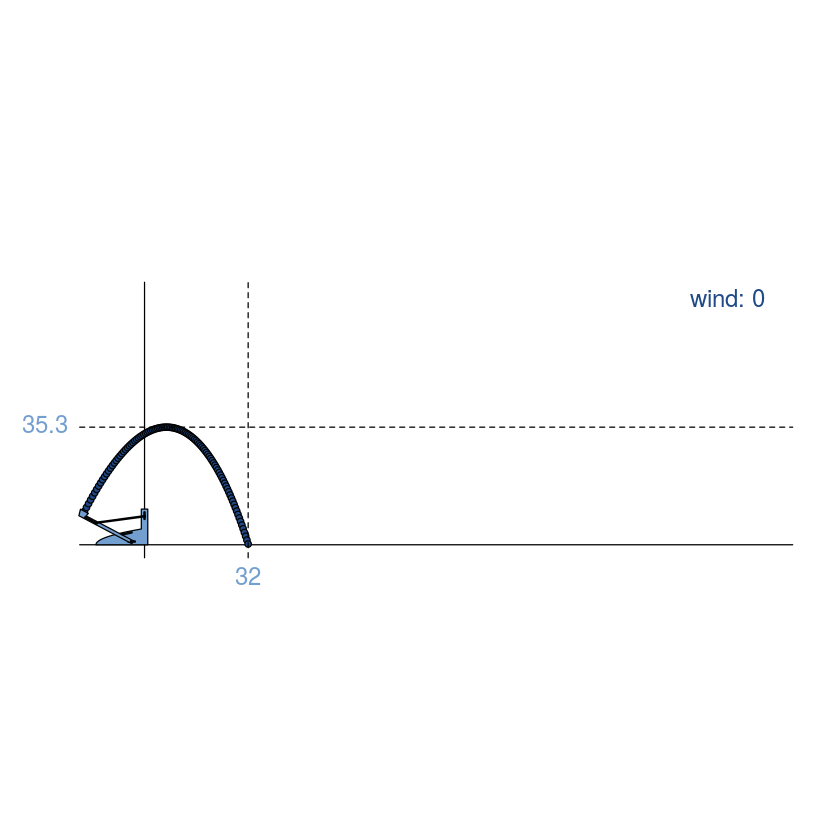

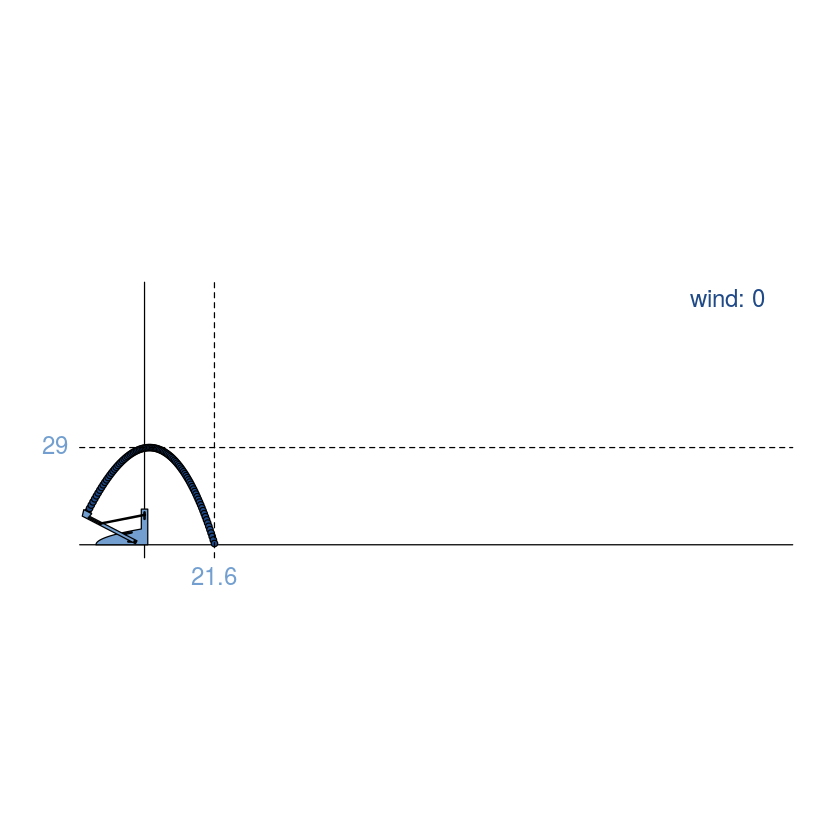

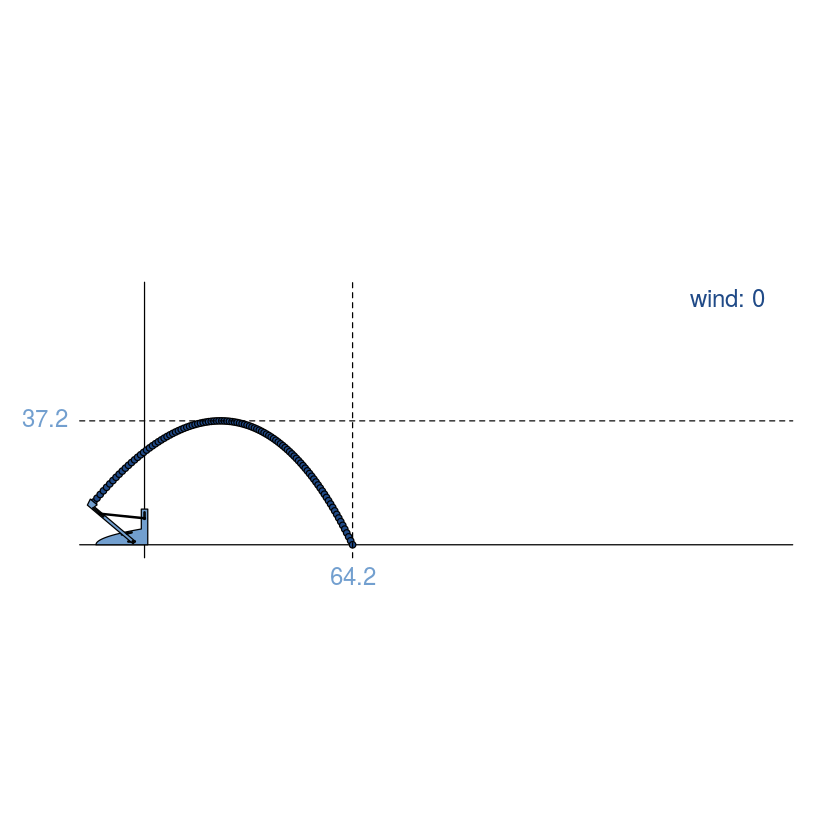

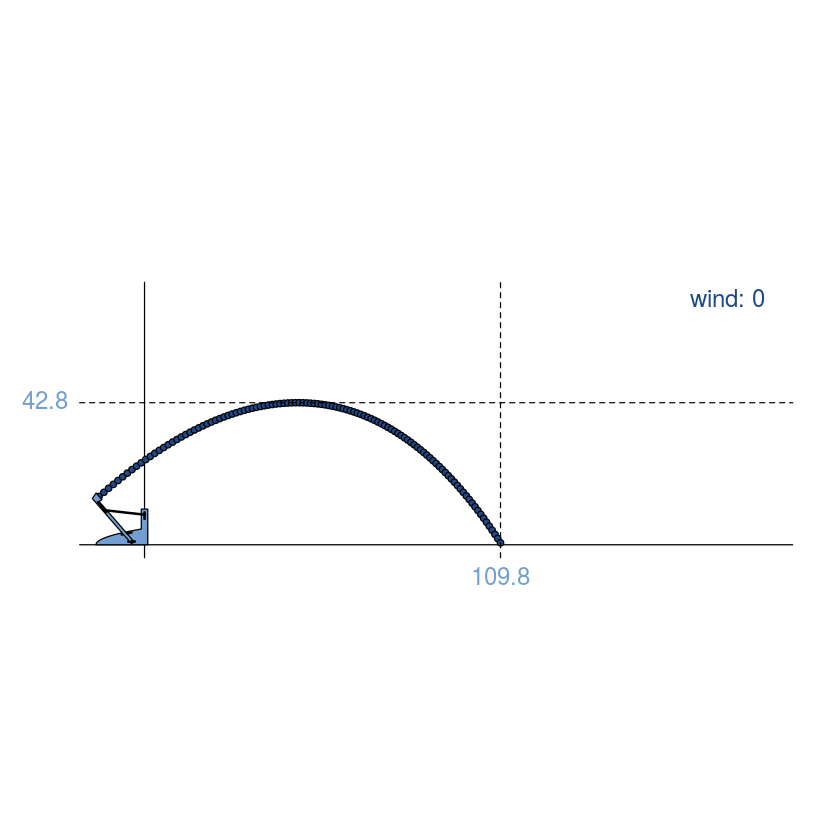

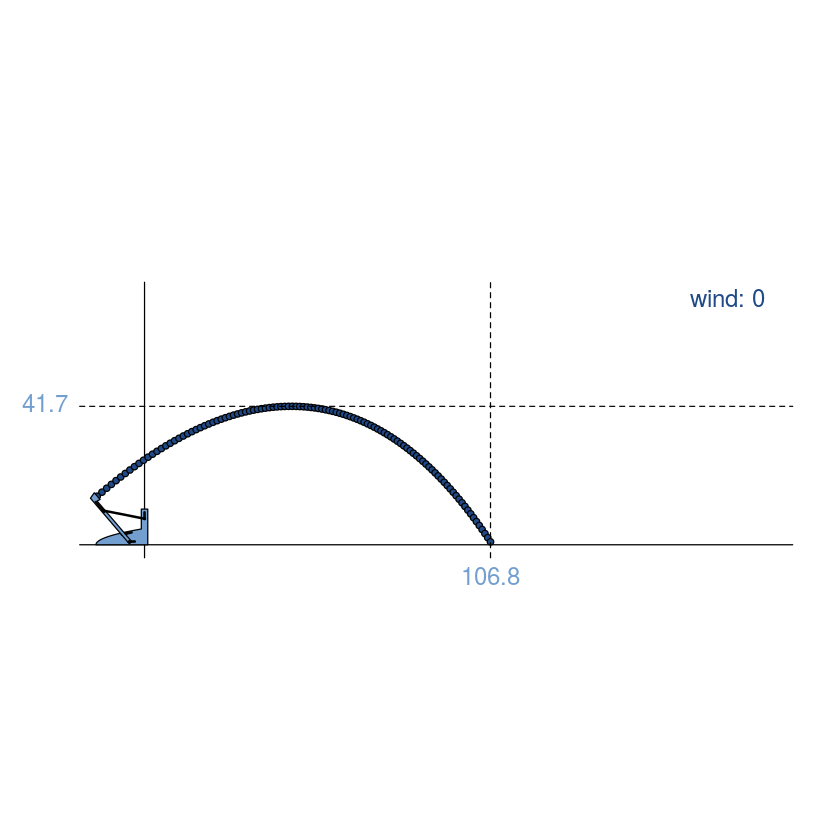

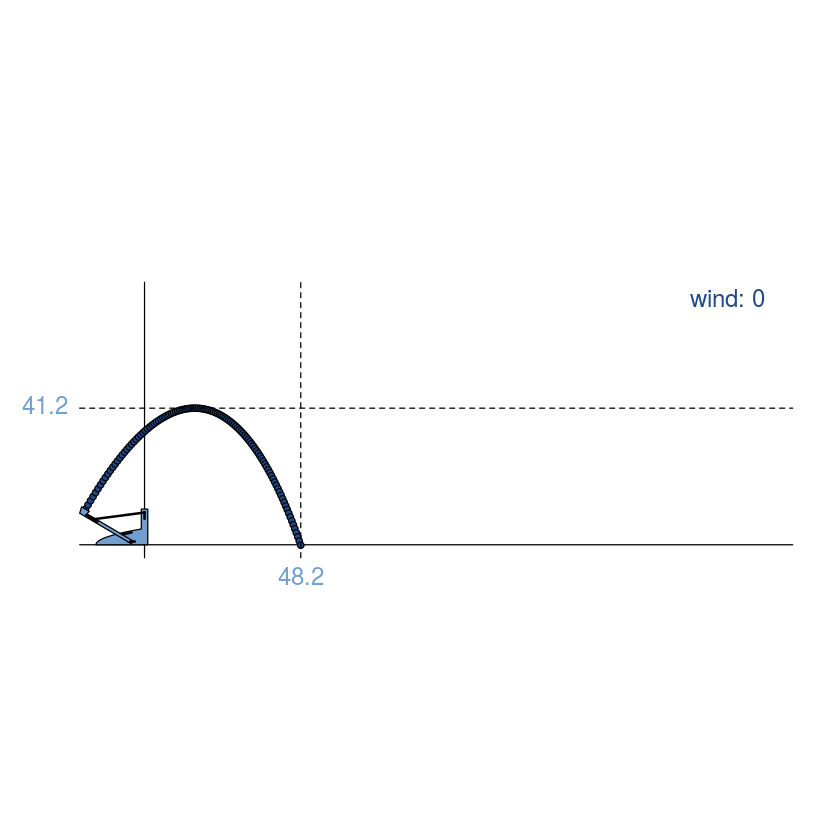

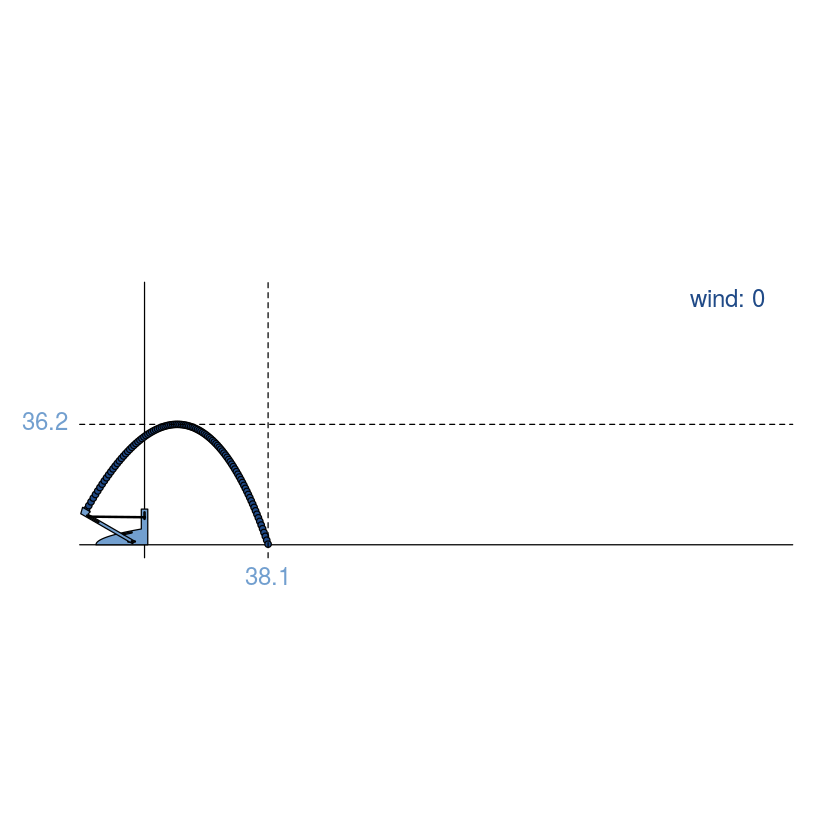

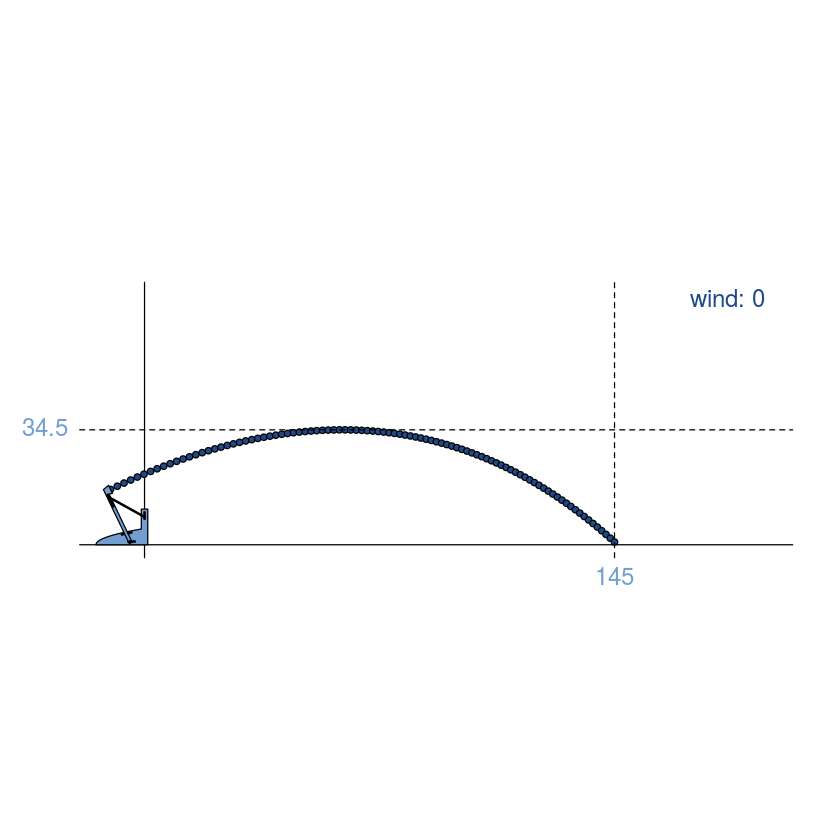

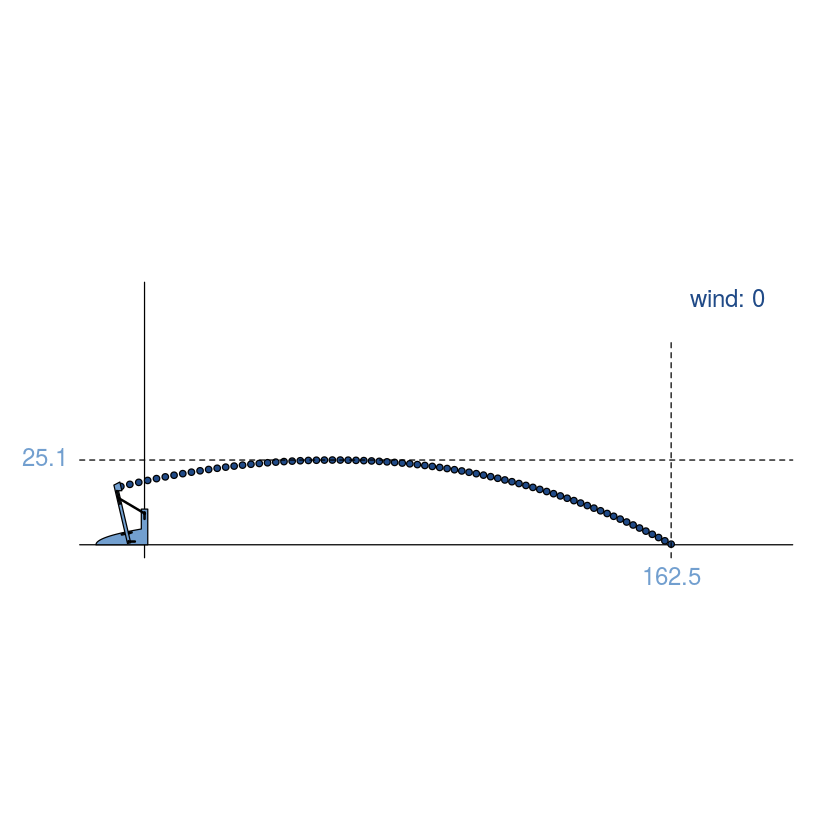

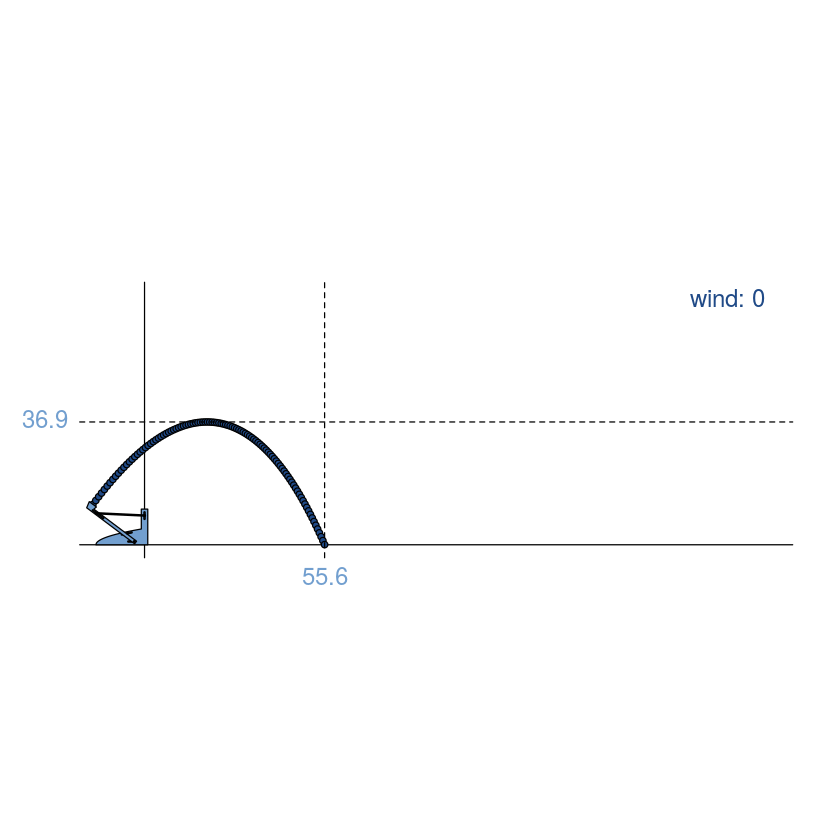

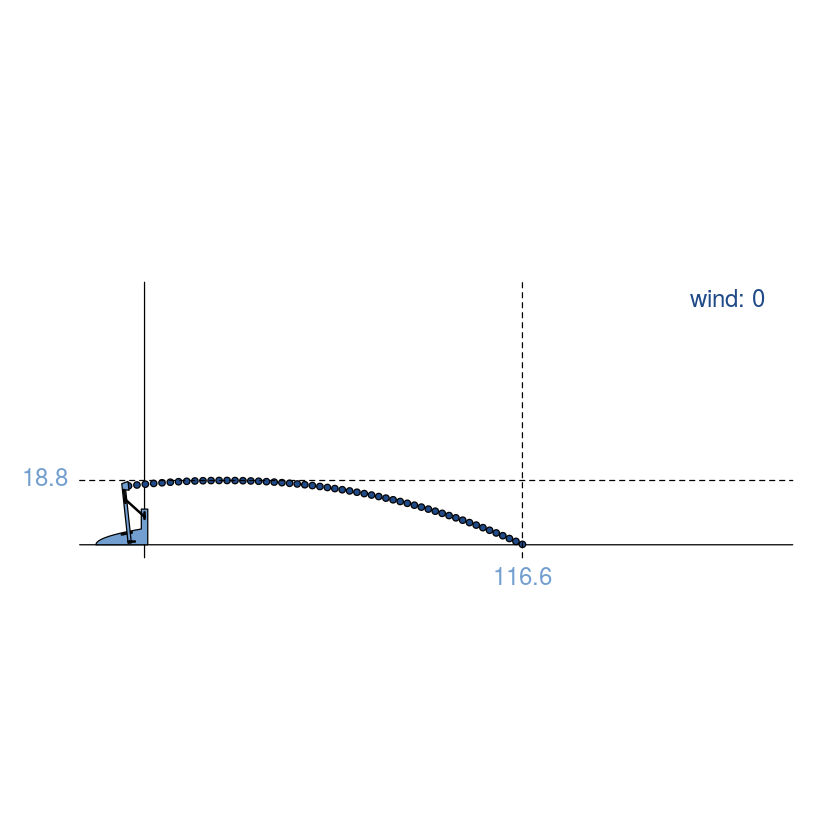

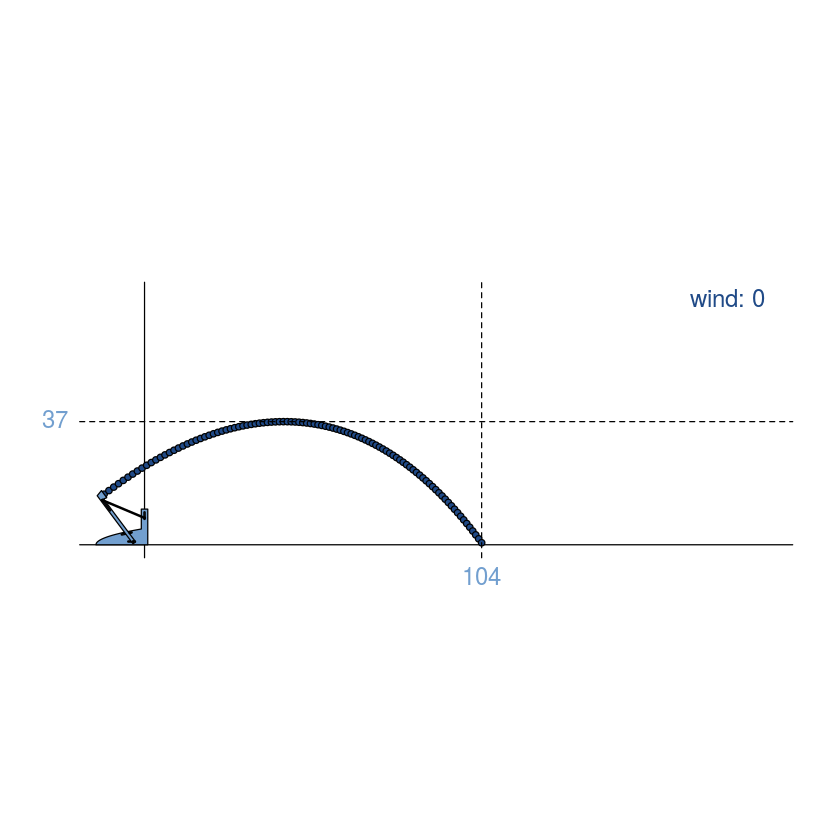

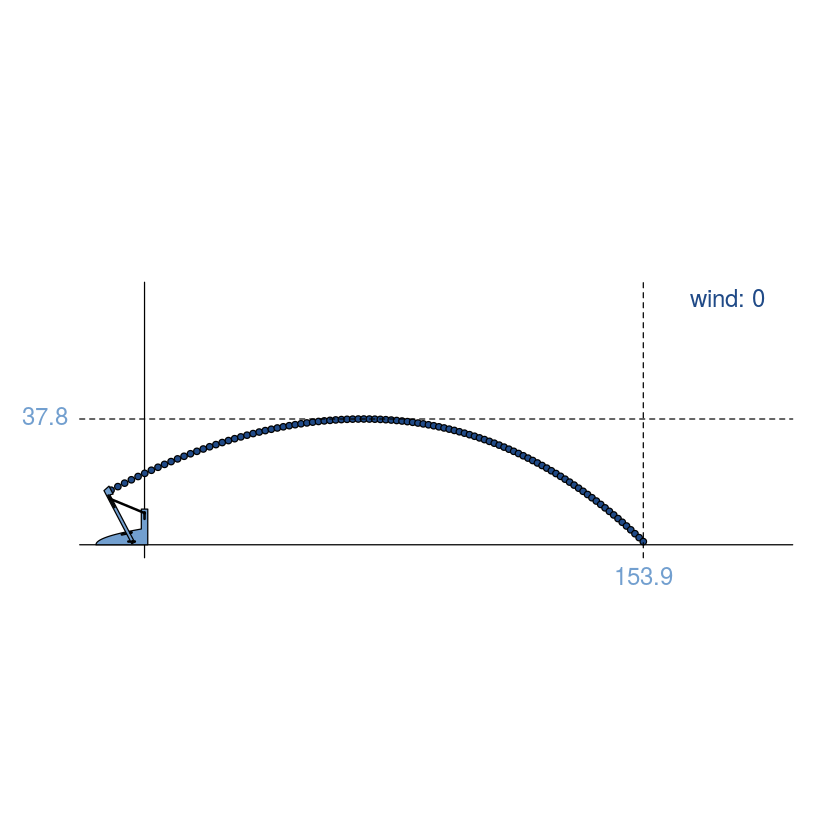

In [4]:
library(DiceDesign)
set.seed(0)
ninit <- 16
d <- 4
X0 <- lhsDesign(n = ninit, dimension = d)$design
Xopt <- maximinESE_LHS(X0, it = 10)
## you may be interested in the convergence
#plot(Xopt$critValues,type="l")
X <- Xopt$design
colnames(X) <- c("axis", "arm", "spring1", "spring2")
pairs(X)
## compute the output values
Y <- apply(X, 1, runExperiment, windFactor = 0)[1, ]


Question : Observe that the design of experiments is "space-filling". <br> Why did we chose that kind of designs? What is the current maximum? Is it far from the maximum value found by-hand?

In [5]:
max(Y)

[1] 162.4945

## Descriptive statistics
*Question : Can you see a simple input-output relation? What can you say about the area corresponding to the maximum value?*

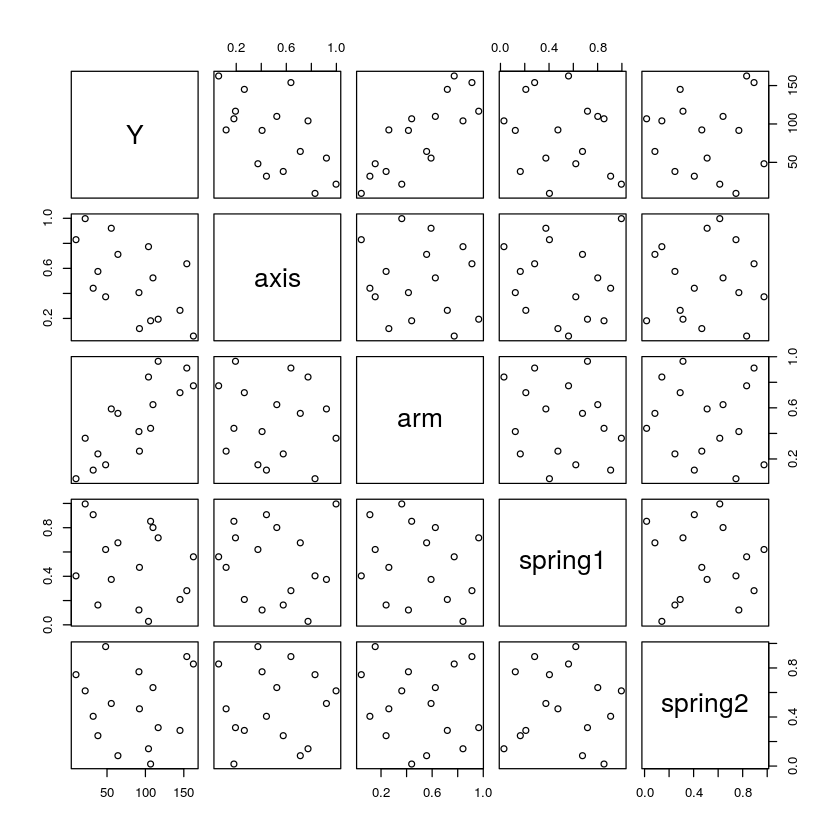

In [6]:
pairs(cbind(Y, X))

## Regression metamodel
<br> *Question : Try the linear models below. If you replace the simulator by one of this model, what would be the optimum? Is it far from your previous guess?*


Call:
lm(formula = Y ~ ., data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.334  -4.769   0.080   7.366  20.316 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    64.82      18.39   3.525 0.004753 ** 
axis          -81.32      15.27  -5.327 0.000242 ***
arm           119.42      15.83   7.545 1.13e-05 ***
spring1       -19.33      15.17  -1.275 0.228684    
spring2        21.06      14.96   1.408 0.186732    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.12 on 11 degrees of freedom
Multiple R-squared:  0.9059,	Adjusted R-squared:  0.8717 
F-statistic: 26.47 on 4 and 11 DF,  p-value: 1.355e-05


[1] 86.3381


Call:
lm(formula = Y ~ . + I(axis^2) + I(arm^2) + I(spring1^2) + I(spring2^2), 
    data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.501  -9.365   1.033   9.651  20.065 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)     52.66      39.09   1.347   0.2199  
axis           -67.84      76.00  -0.893   0.4017  
arm            211.92      72.78   2.912   0.0226 *
spring1        -39.34      75.05  -0.524   0.6163  
spring2        -10.52      66.44  -0.158   0.8787  
I(axis^2)      -14.19      70.44  -0.201   0.8461  
I(arm^2)       -91.00      68.90  -1.321   0.2281  
I(spring1^2)    19.51      70.66   0.276   0.7904  
I(spring2^2)    39.52      64.69   0.611   0.5606  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.5 on 7 degrees of freedom
Multiple R-squared:  0.9301,	Adjusted R-squared:  0.8501 
F-statistic: 11.64 on 8 and 7 DF,  p-value: 0.002051


Start:  AIC=98.76
Y ~ axis + arm + spring1 + spring2

          Df Sum of Sq     RSS     AIC
- spring1  1     476.4  3701.8  98.194
- spring2  1     581.4  3806.7  98.641
<none>                  3225.3  98.762
- axis     1    8321.4 11546.8 116.395
- arm      1   16692.1 19917.4 125.119

Step:  AIC=98.19
Y ~ axis + arm + spring2

          Df Sum of Sq     RSS     AIC
- spring2  1     651.1  4352.9  98.014
<none>                  3701.8  98.194
- axis     1    7982.0 11683.8 113.812
- arm      1   19045.1 22746.8 124.471

Step:  AIC=98.01
Y ~ axis + arm

       Df Sum of Sq     RSS     AIC
<none>               4352.9  98.014
- axis  1      7924 12276.9 111.831
- arm   1     18439 22792.2 121.731



Call:
lm(formula = Y ~ axis + arm, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.113  -7.451   2.187  10.176  30.496 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    63.38      13.05   4.858 0.000313 ***
axis          -78.85      16.21  -4.865 0.000309 ***
arm           120.96      16.30   7.421 5.04e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.3 on 13 degrees of freedom
Multiple R-squared:  0.873,	Adjusted R-squared:  0.8534 
F-statistic: 44.68 on 2 and 13 DF,  p-value: 1.496e-06


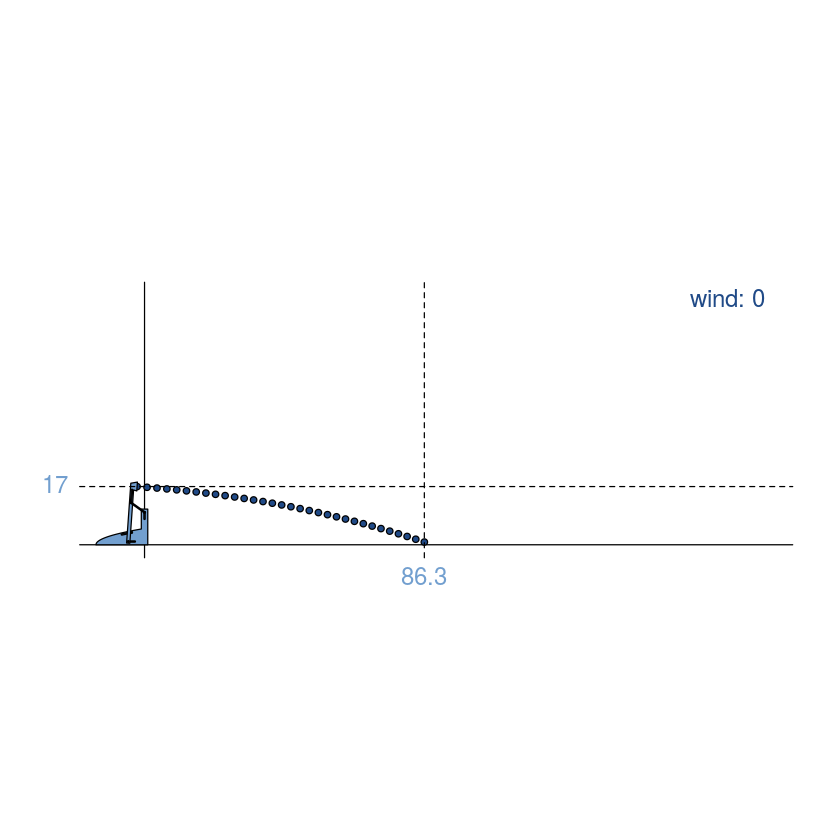

In [7]:
myData <- data.frame(X, Y = Y)
mReg <- lm(Y ~ ., data = myData)
summary(mReg)
runExperiment(c(0, 1, 1, 1), windFactor = 0)[1]
mReg2 <- lm(Y~ . + I(axis^2) + I (arm^2) + I (spring1^2) + I(spring2^2), data = myData)
summary(mReg2)
mStep <- step(object = mReg, scope = mReg2, direction = "both", k = log(length(Y)))
summary(mStep)

## Bayesian optimization
Now, let us try the EGO method (Bayesian optimization)
<br> *Question : Recall its main principles.*


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -73.48833 -75.88534 -77.37101 -77.58722 -79.20687 



Warning message:
“executing %dopar% sequentially: no parallel backend registered”


N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       73.488  |proj g|=        1.145
At iterate     1  f =       72.773  |proj g|=        1.0374
At iterate     2  f =       71.944  |proj g|=       0.72097
At iterate     3  f =        71.84  |proj g|=       0.90383
At iterate     4  f =       71.703  |proj g|=        1.3708
At iterate     5  f =       71.616  |proj g|=         1.062
At iterate     6  f =         71.6  |proj g|=       0.13378
At iterate     7  f =       71.591  |proj g|=       0.26421
At iterate     8  f =       71.569  |proj g|=       0.52642
At iterate     9  f =       71.564  |proj g|=       0.44332
At iterate    10  f =       71.562  |proj g|=      0.021479
At iterate    11  f =       71.562  |proj g|=      0.013962
At iterate    12  f =       71.562  |proj g|=     0.0024829
At iterate    13  f =       71.562  |proj g|=    9.4506e-07

iterations 13
function evaluations 16
segments explored during Cauchy s

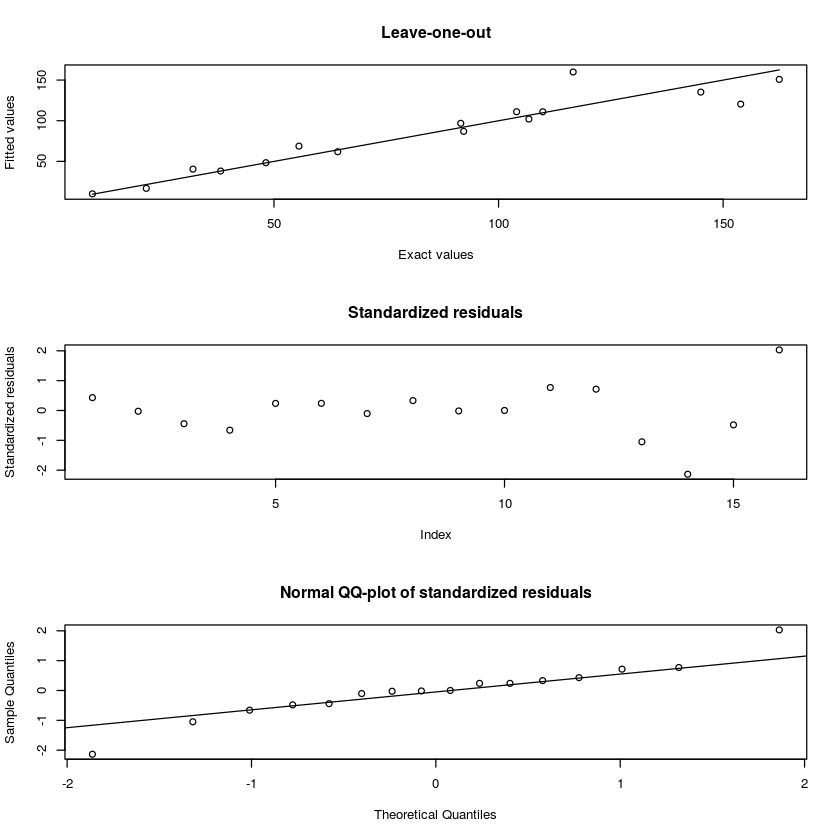

In [8]:
library(DiceKriging)
mGP0 <- km(~ 1, design = X, response = Y, multistart = 5)
print(mGP0)   # display model
plot(mGP0)    # visual model validation

*Questions: What is the role of the argument 'multistart'? What can you say about the performance and the validity of this first model?*

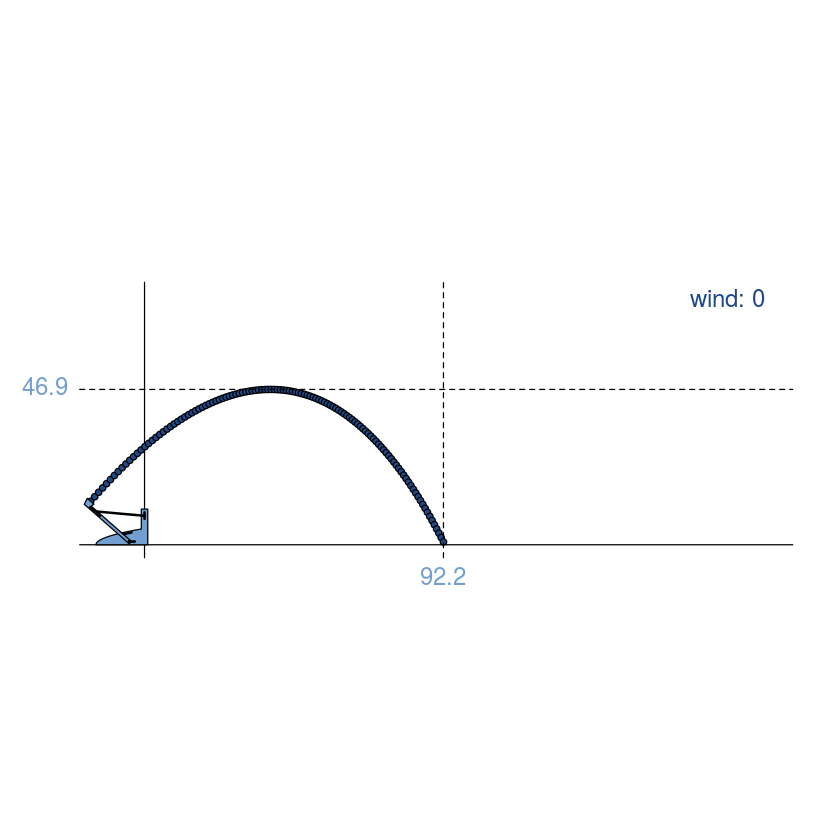

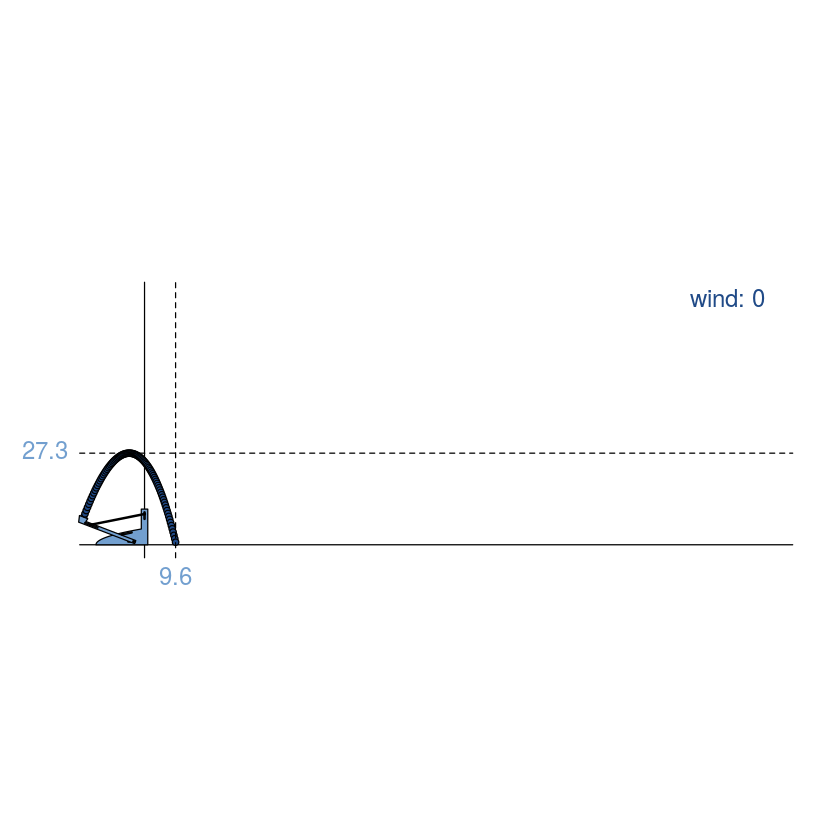

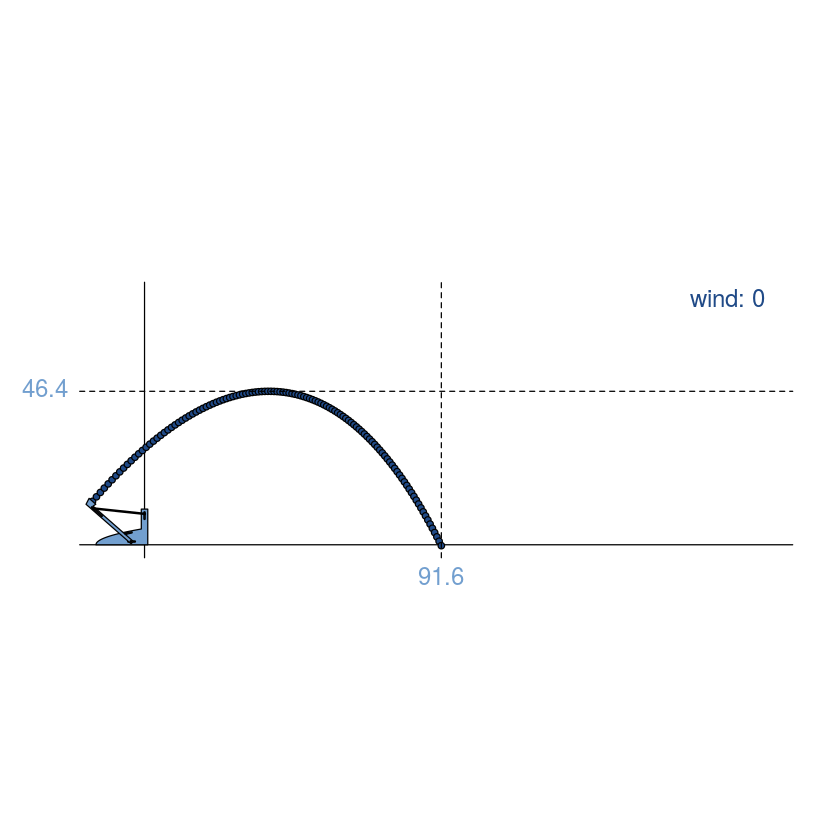

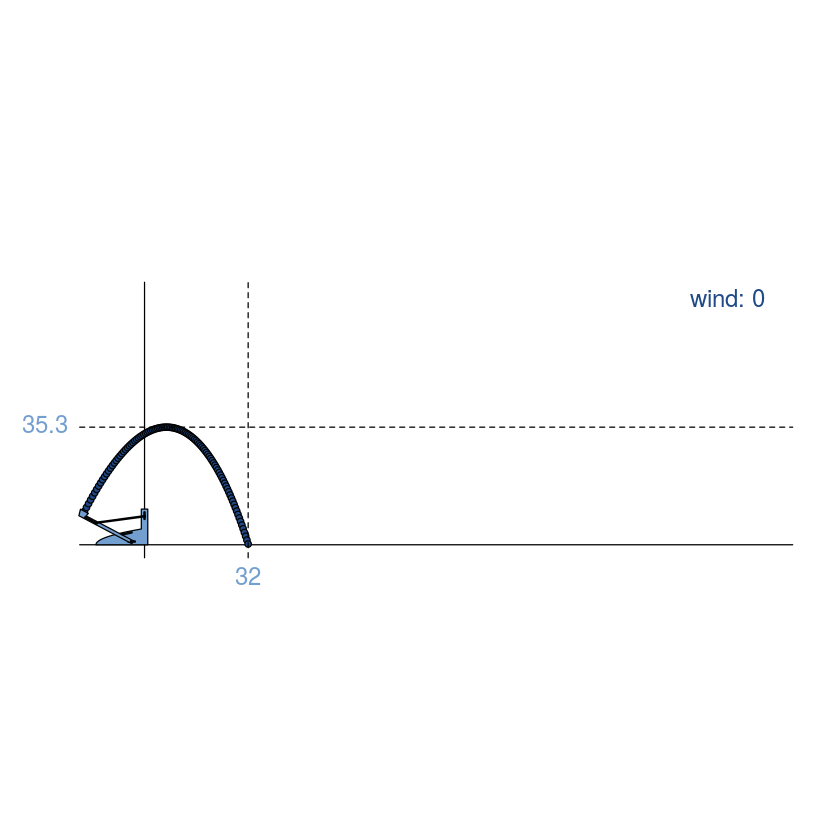

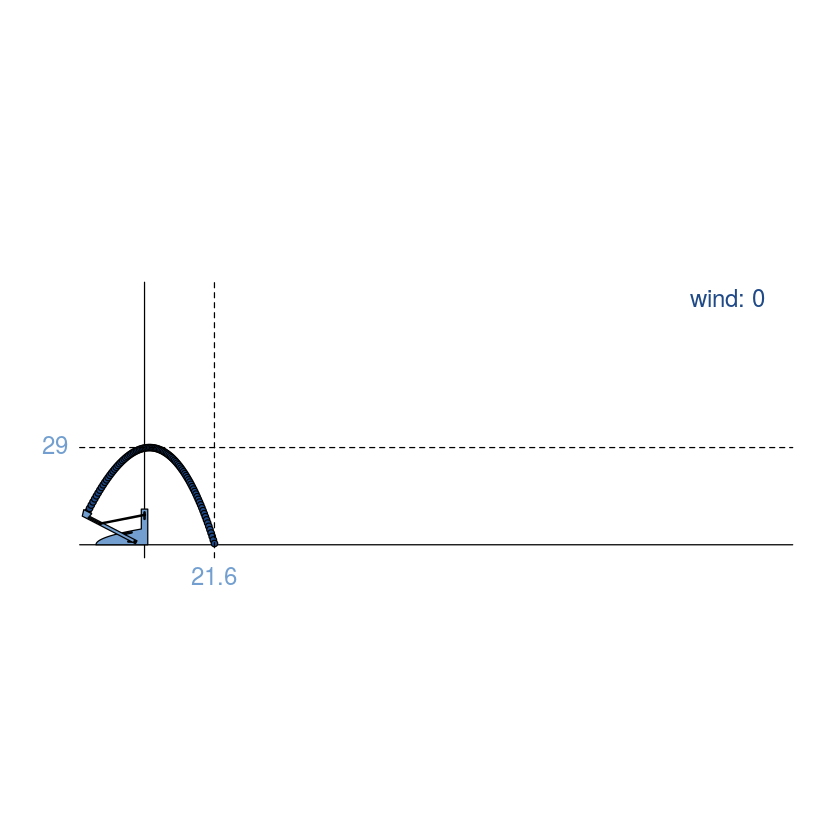

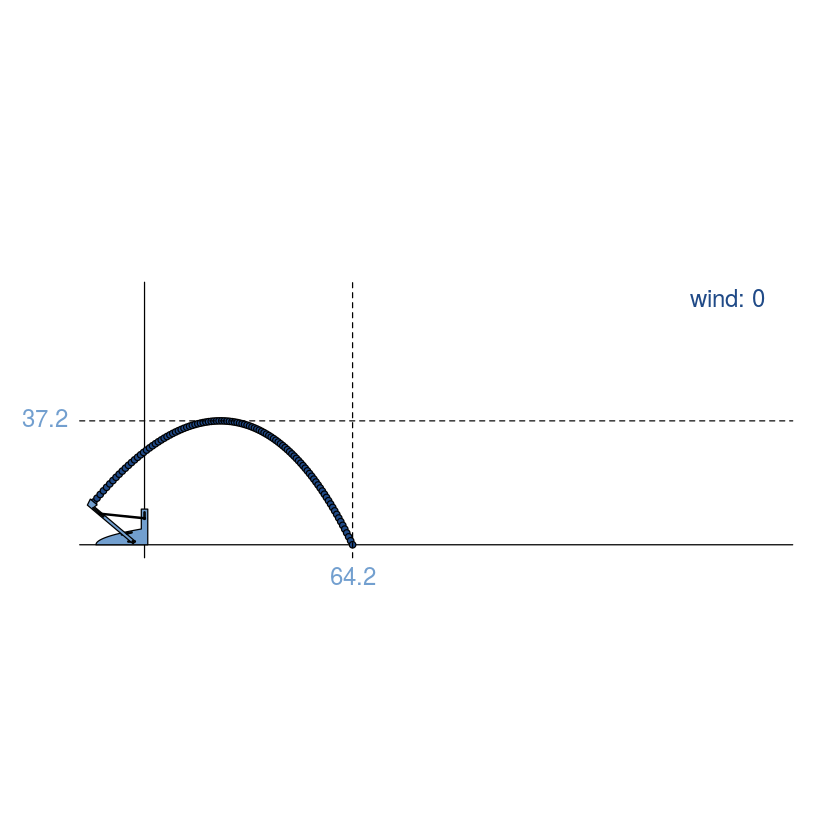

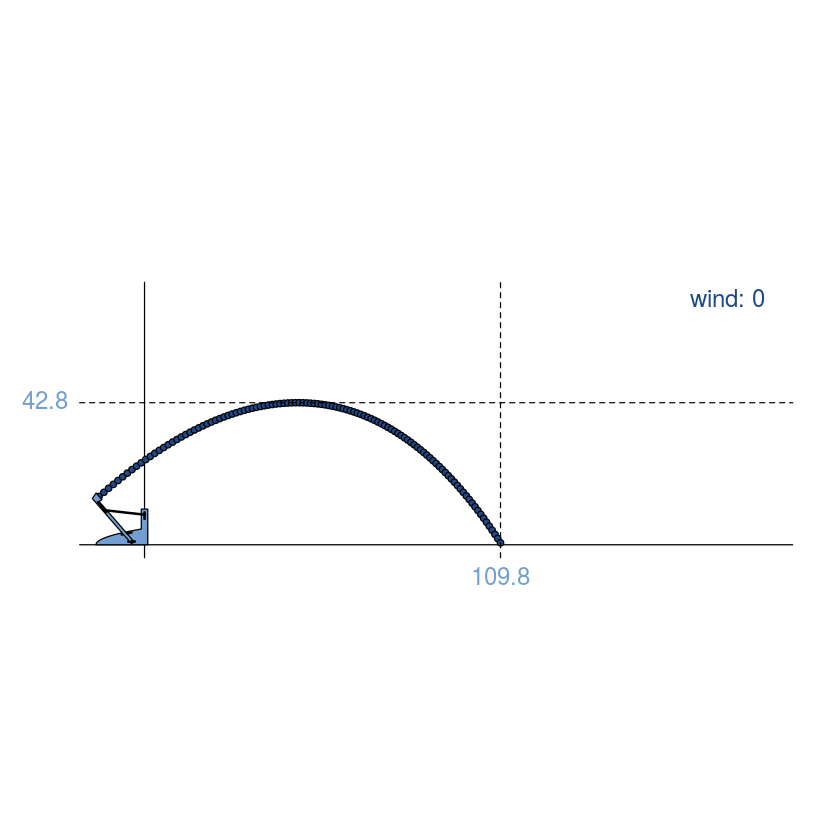

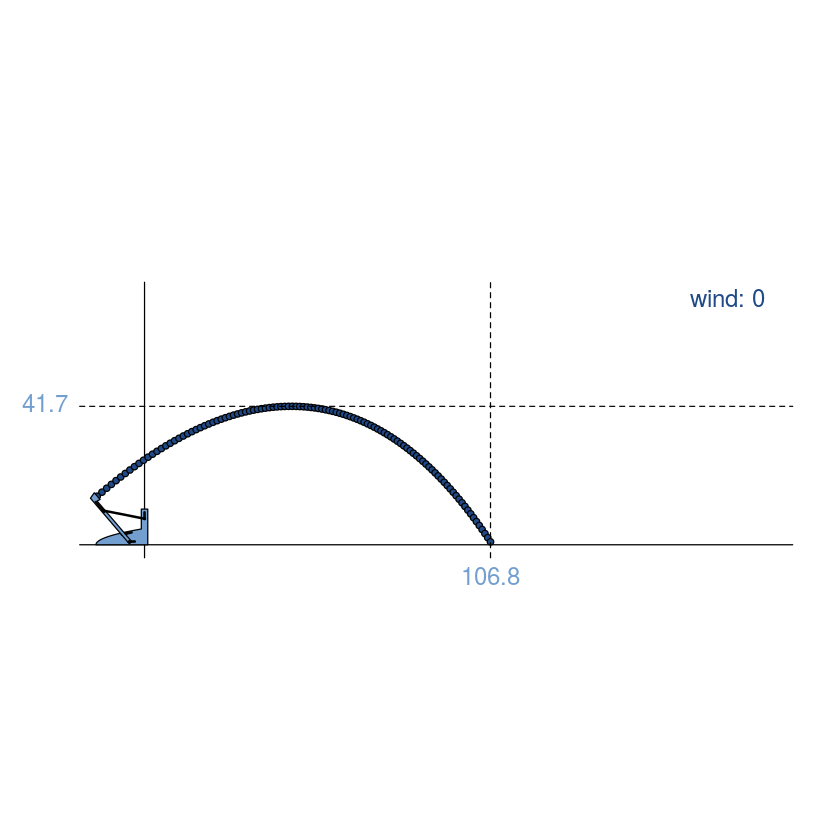

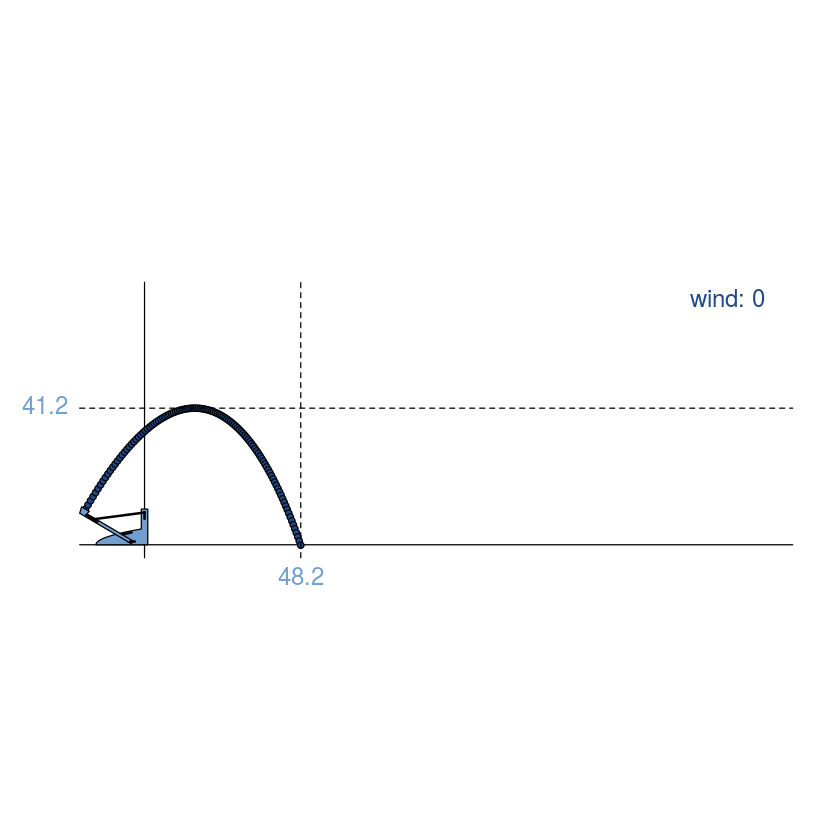

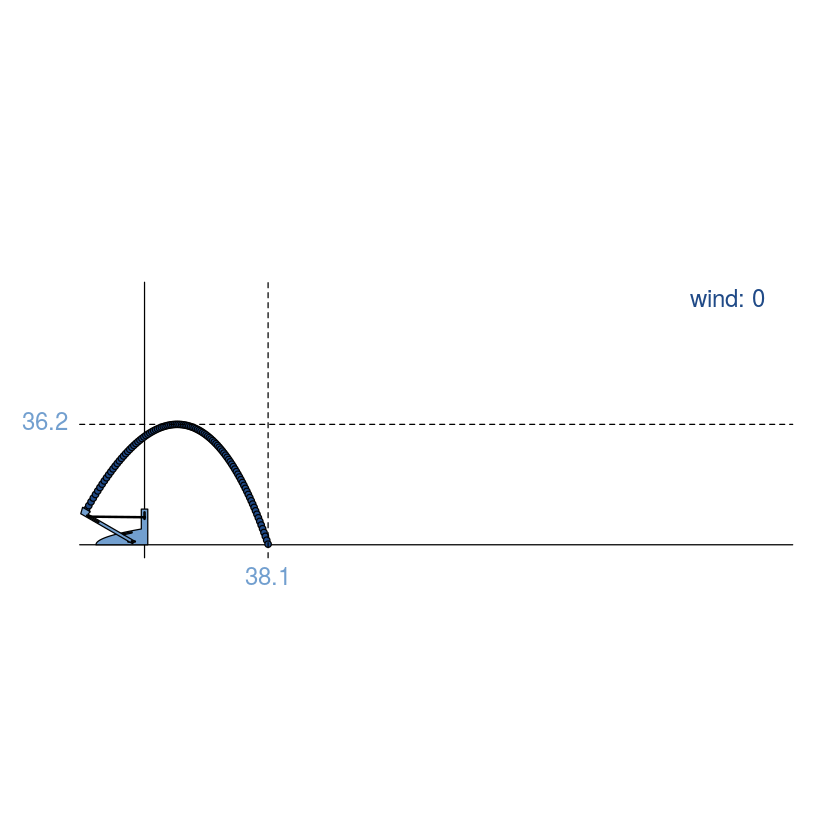

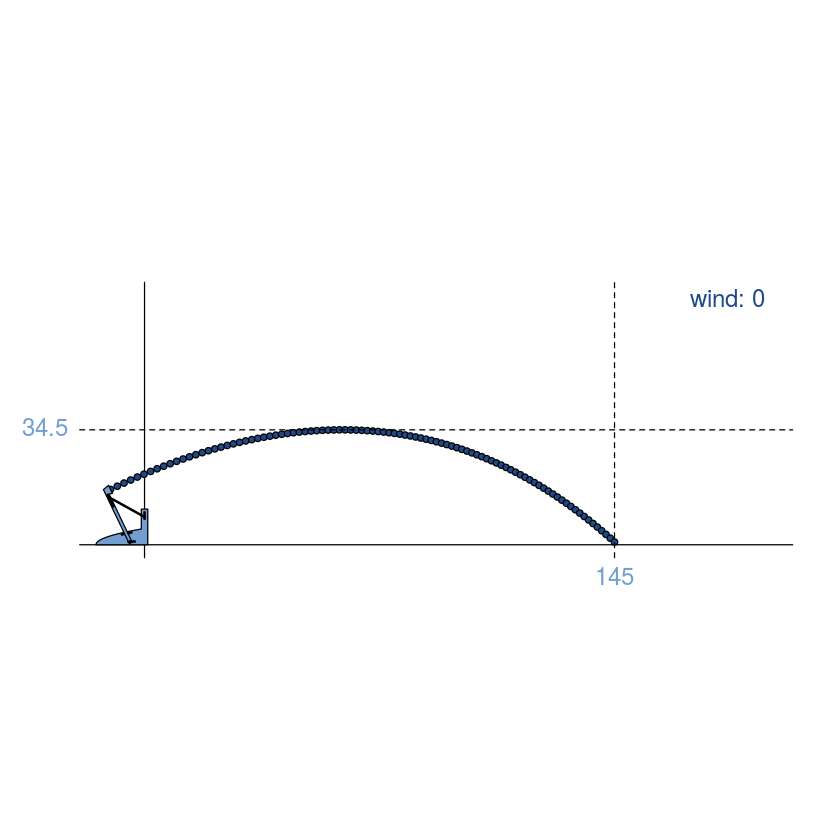

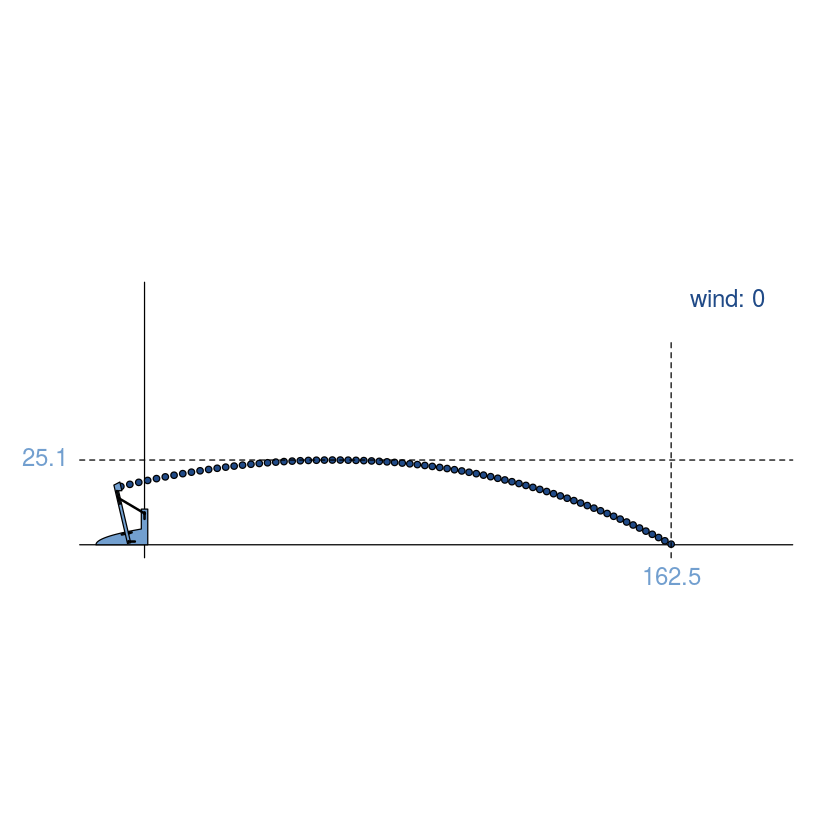

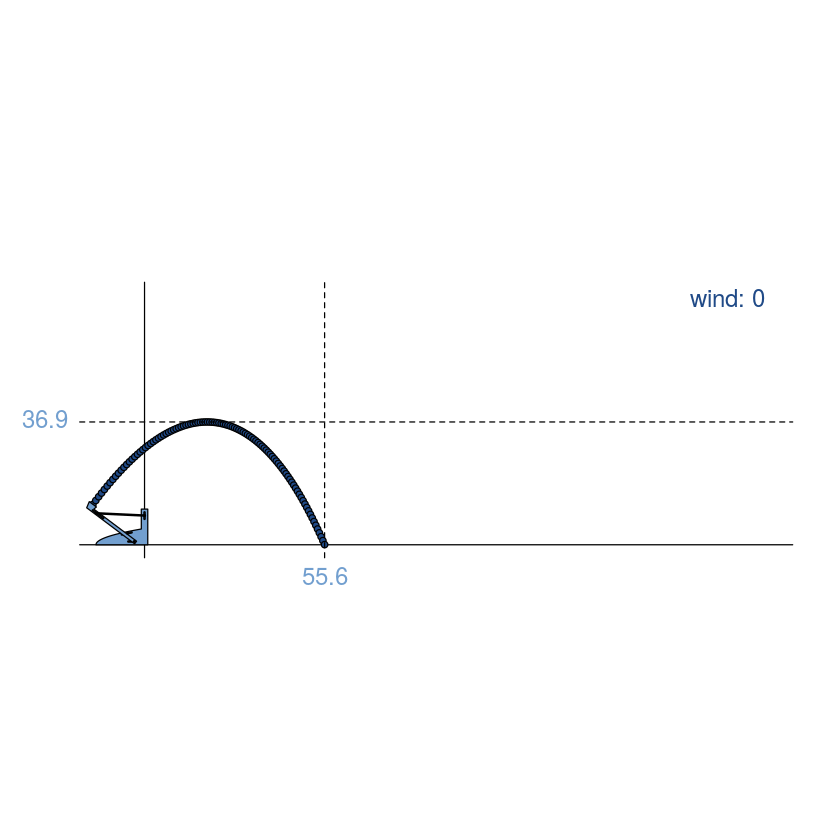

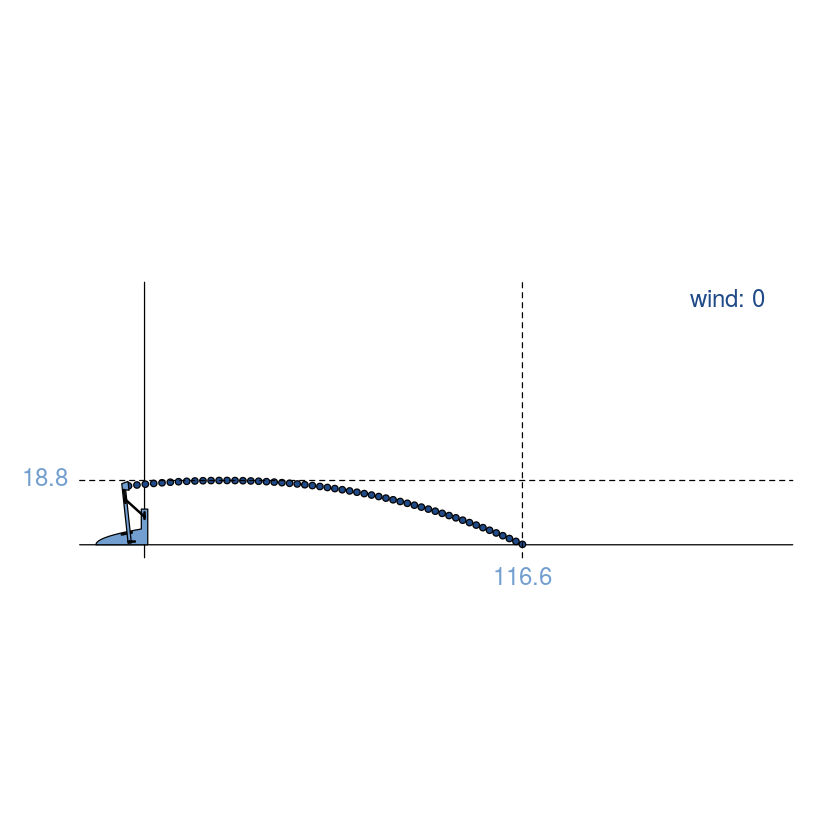

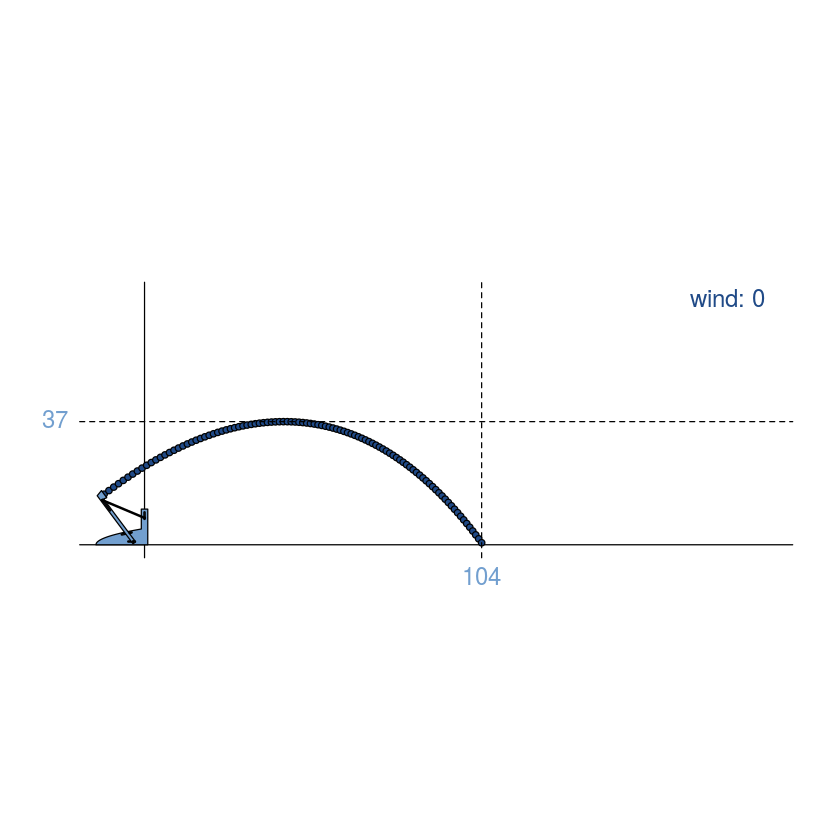


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -74.91098 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       74.911  |proj g|=        1.502
At iterate     1  f =       73.706  |proj g|=        1.2168
At iterate     2  f =       73.001  |proj g|=        1.1328
At iterate     3  f =       72.367  |proj g|=        1.4181
At iterate     4  f =       72.056  |proj g|=        1.3827
At iterate     5  f =       71.648  |proj g|=       0.37015
At iterate     6  f =       71.563  |proj g|=       0.11779
At iterate     7  f =       71.562  |proj g|=      0.054386
At iterate     8  f =       71.562  |proj g|=      

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”



NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 1.328577e+01

Parameters at the Solution (parameter, gradient):

 X[ 1] :	1.616548e-01	G[ 1] :	2.747356e-06
 X[ 2] :	8.045908e-01	G[ 2] :	-1.359096e-06
 X[ 3] :	0.000000e+00	G[ 3] :	-4.131892e+00
 X[ 4] :	1.000000e+00	G[ 4] :	1.887406e+01

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 16 13:44:17 2021
Total run time : 0 hours 0 minutes and 0 seconds


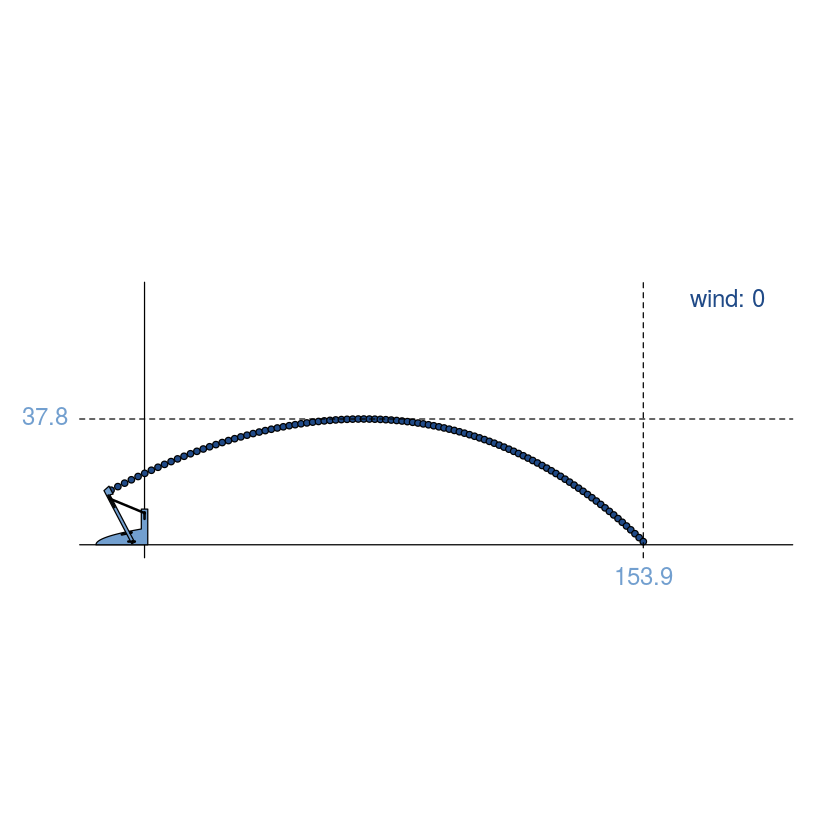

Expected improvement was: 13.29 
Actual improvement is: 8.75 
   (>0 means the new point is better, <0 means it is worse)

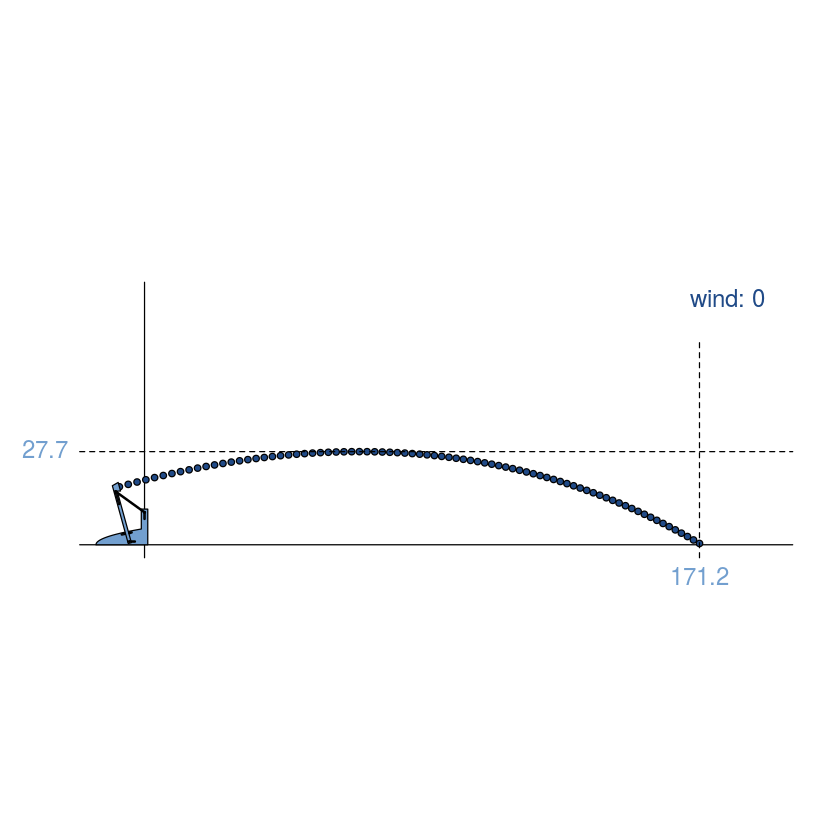

In [10]:
library(DiceOptim)

## We first transform the problem to a minimization one
runExperimentFun <- function(x) {
    - runExperiment(x, wind = 0)[1]
}
Y <- apply(X, 1, runExperimentFun)
mGP0 <- km(~ 1, design = X, response = Y)

## Step 1 ##
oEGO <- max_EI(model = mGP0, lower = rep(0, d), upper = rep(1, d))
newX <- oEGO$par
newy <- runExperimentFun(newX)

cat("Expected improvement was:", round(oEGO$value, 2),
    "\nActual improvement is:", round(min(Y) - newy, 2),
    "\n   (>0 means the new point is better, <0 means it is worse)")


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -79.91007 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        79.91  |proj g|=       1.1906
At iterate     1  f =       77.738  |proj g|=        1.0072
At iterate     2  f =       76.249  |proj g|=        1.3779
At iterate     3  f =       75.767  |proj g|=        1.3911
At iterate     4  f =        75.38  |proj g|=       0.54625
At iterate     5  f =       75.169  |proj g|=       0.39556
At iterate     6  f =       75.027  |proj g|=        1.3624
At iterate     7  f =       74.919  |proj g|=         1.103
At iterate     8  f =       74.912  |proj g|=      

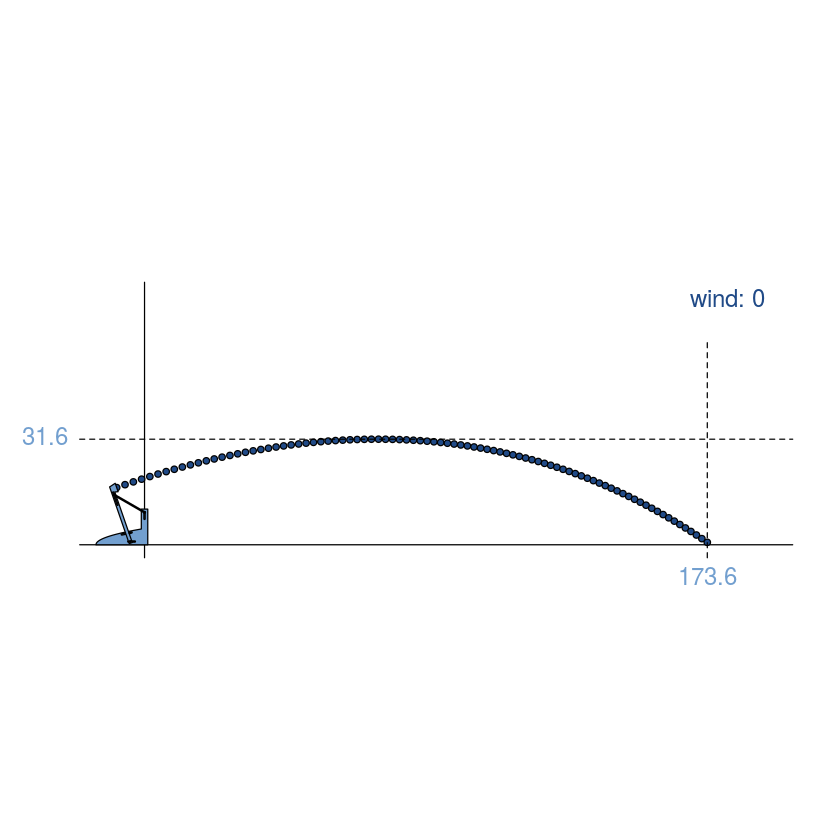

In [11]:
# Then we update the model
mGP1 <- update(mGP0, newX, newy)
# and maximize again the expected improvement: 
## Step 2 ##
oEGO <- max_EI(model = mGP1, lower = rep(0, d), upper = rep(1, d))
newX <- oEGO$par
newy <- runExperimentFun(newX)

cat("Expected improvement was:", round(oEGO$value, 2),
    "\nActual improvement is:", round(min(mGP1@y) - newy, 2),
    "\n   (>0 means the new point is better, <0 means its worst)")



Thu Sep 16 13:45:41 2021
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+00 
 0.000000e+00   <=  X2   <=    1.000000e+00 
 0.000000e+00   <=  X3   <=    1.000000e+00 
 0.000000e+00   <=  X4   <=    1.000000e+00 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	5
	(2) Uniform Mutation.................. 	6
	(3) Boundary Mutation................. 	6
	(4) Non-Uniform Mutation.............. 	6
	(5) Polytope Crossover................ 	6
	(6) Simple Crossover.................. 	6
	(7) Whole Non-Uniform Mutation........ 	6
	(8) Heuristic Crossover............... 	6
	(9) Local-Minimum Crossover........... 	0

HARD Maximum Number of Generations: 12
Maximum Nonchanging Generations: 2
Population size       : 48
Convergence Tolerance: 1.000000e-21

Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Not Using Out of Bounds Individuals and Not Allowing Trespassing.


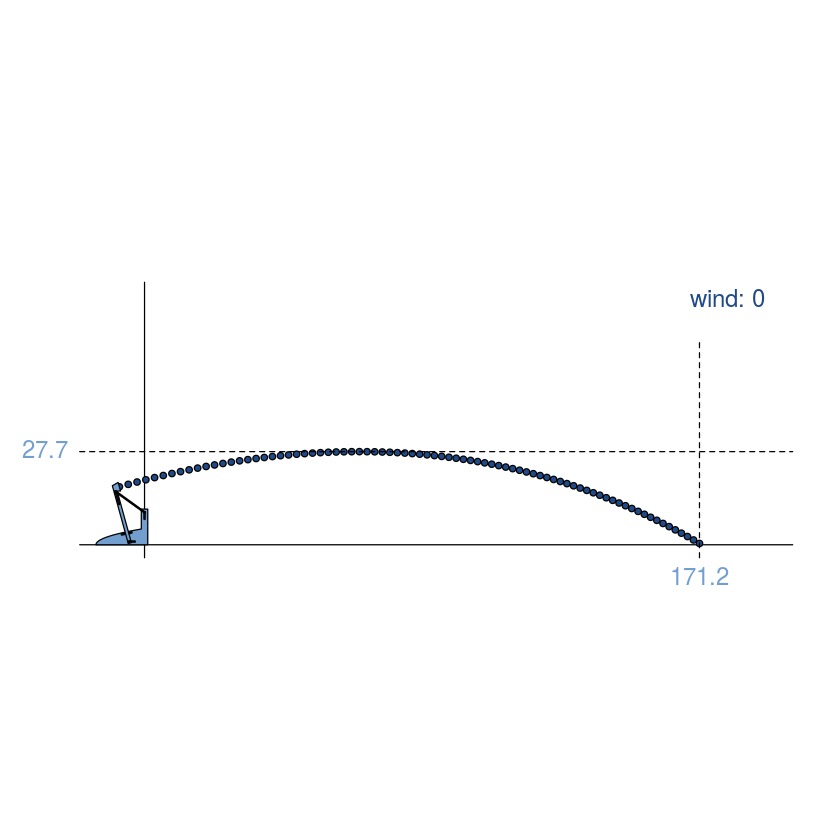


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -81.62397 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       81.624  |proj g|=        1.186
At iterate     1  f =       79.231  |proj g|=       0.67559
At iterate     2  f =       78.783  |proj g|=        1.1463
At iterate     3  f =       78.357  |proj g|=        1.1157
At iterate     4  f =       78.174  |proj g|=       0.94465
At iterate     5  f =       78.064  |proj g|=       0.67449
At iterate     6  f =       78.041  |proj g|=       0.17515
At iterate     7  f =        78.04  |proj g|=      0.015263
At iterate     8  f =        78.04  |proj g|=    0.

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


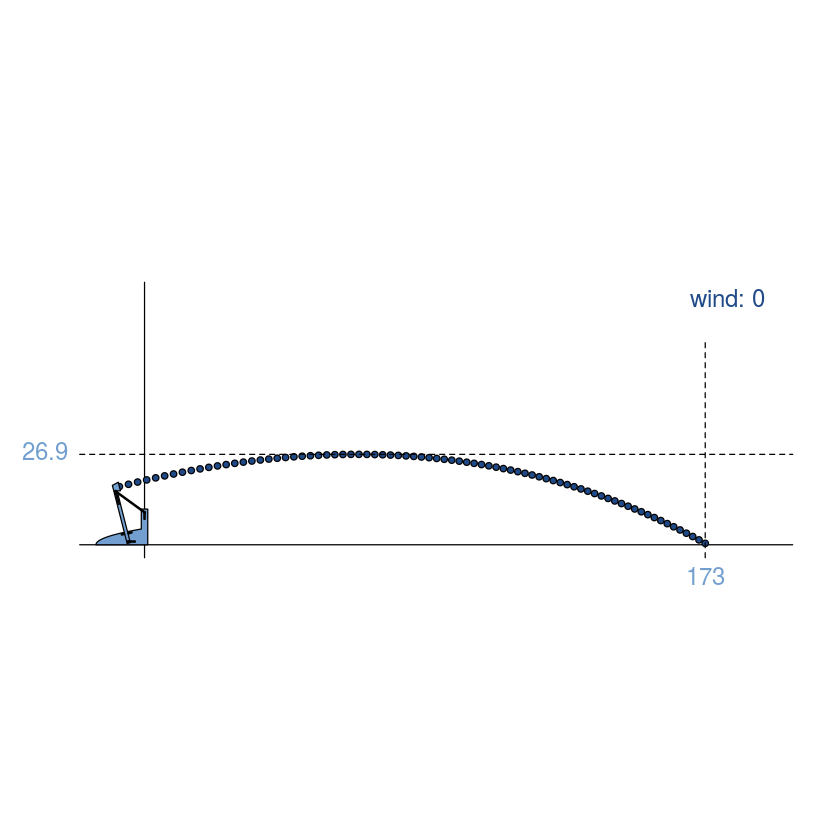


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 1.529749e+01

Parameters at the Solution (parameter, gradient):

 X[ 1] :	1.293734e-01	G[ 1] :	-7.342568e-05
 X[ 2] :	6.665954e-01	G[ 2] :	1.738553e-04
 X[ 3] :	1.326019e-01	G[ 3] :	2.064694e-04
 X[ 4] :	1.000000e+00	G[ 4] :	2.868442e+01

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 16 13:45:43 2021
Total run time : 0 hours 0 minutes and 1 seconds


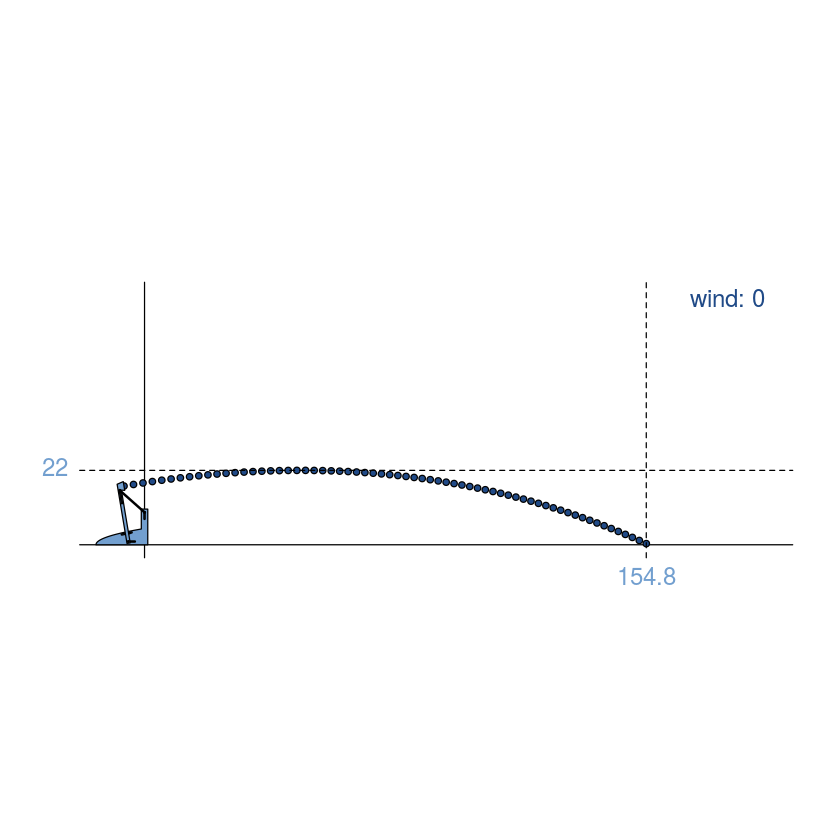


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -93.42128 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       93.421  |proj g|=       0.7757
At iterate     1  f =       92.331  |proj g|=       0.70084
At iterate     2  f =       90.575  |proj g|=       0.42942
At iterate     3  f =       90.504  |proj g|=        1.5632
At iterate     4  f =       90.328  |proj g|=        1.5329
At iterate     5  f =       90.229  |proj g|=         1.036
At iterate     6  f =       89.779  |proj g|=        0.5959
At iterate     7  f =       89.754  |proj g|=       0.41707
At iterate     8  f =       89.746  |proj g|=      

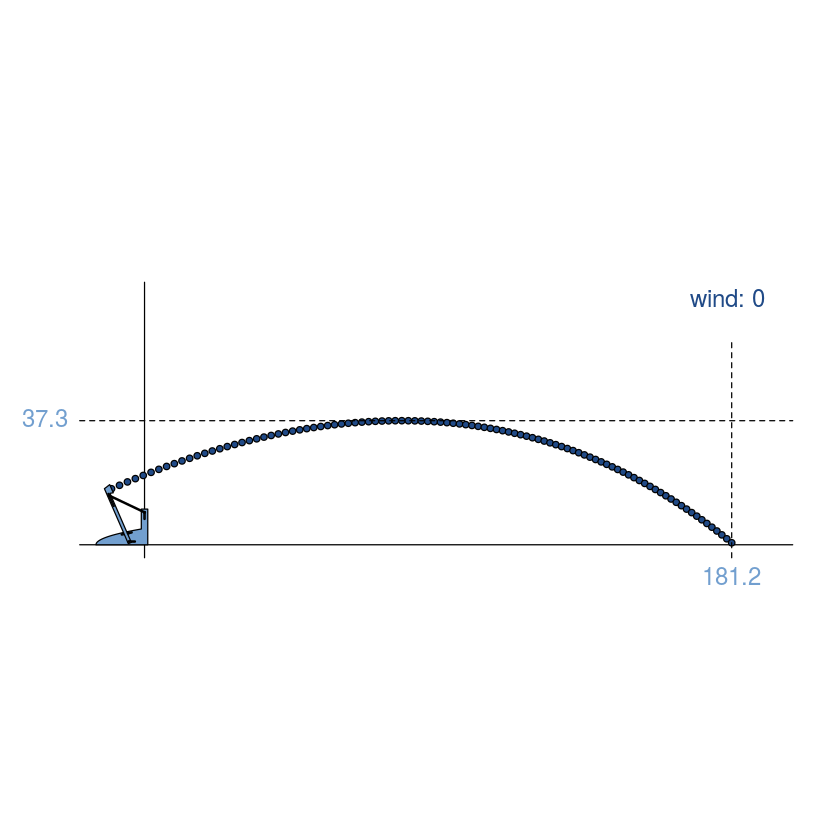


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -102.7295 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       102.73  |proj g|=       1.6792
At iterate     1  f =       97.353  |proj g|=        1.5161
At iterate     2  f =       95.929  |proj g|=        1.4162
At iterate     3  f =       94.401  |proj g|=        1.3995
At iterate     4  f =       93.709  |proj g|=        1.2003
At iterate     5  f =       93.631  |proj g|=       0.52382
At iterate     6  f =        93.54  |proj g|=       0.72853
At iterate     7  f =       93.485  |proj g|=       0.60695
At iterate     8  f =       93.475  |proj g|=      

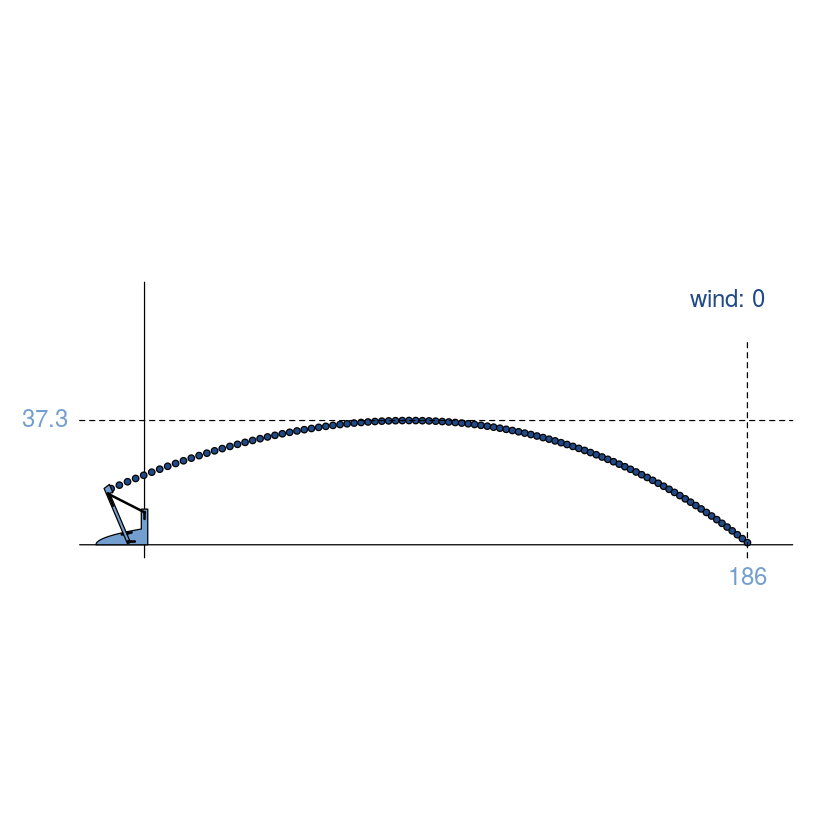


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -100.9763 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       100.98  |proj g|=       1.4505
At iterate     1  f =       99.209  |proj g|=       0.68733
At iterate     2  f =       98.228  |proj g|=        1.5374
At iterate     3  f =        98.01  |proj g|=       0.59878
At iterate     4  f =       97.903  |proj g|=       0.58186
At iterate     5  f =       97.407  |proj g|=        1.5273
At iterate     6  f =       96.958  |proj g|=        1.5227
At iterate     7  f =       96.673  |proj g|=       0.38797
At iterate     8  f =       96.668  |proj g|=      

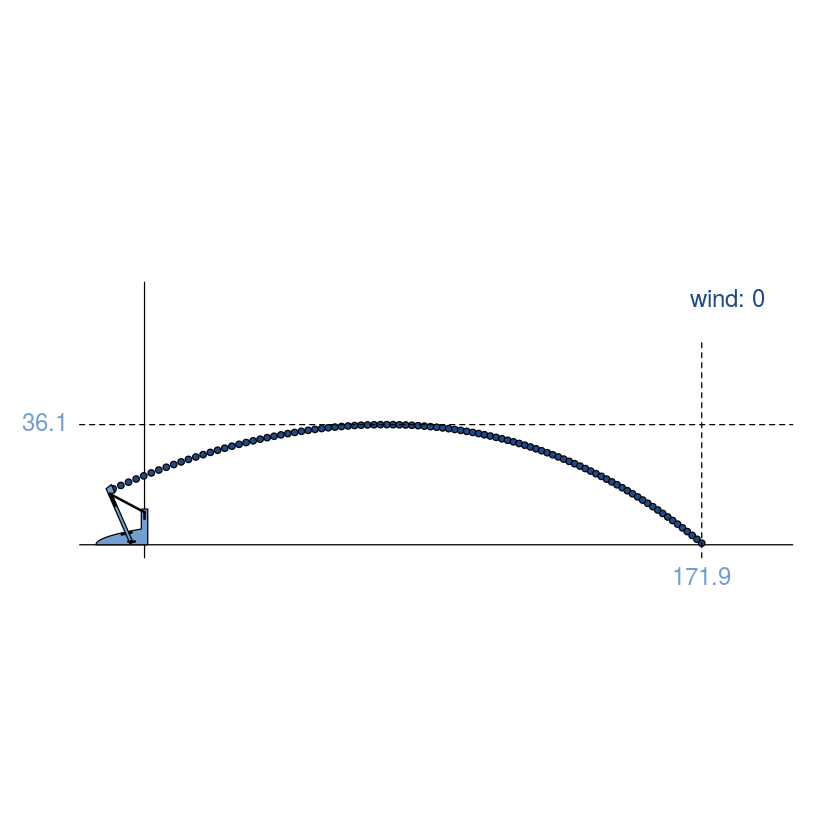


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -102.9797 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       102.98  |proj g|=       1.4179
At iterate     1  f =       102.22  |proj g|=       0.57672
At iterate     2  f =       101.61  |proj g|=       0.41314
At iterate     3  f =        101.5  |proj g|=        1.5073
At iterate     4  f =       101.45  |proj g|=        1.5005
At iterate     5  f =        101.1  |proj g|=       0.59209
At iterate     6  f =       101.07  |proj g|=       0.57727
At iterate     7  f =       101.06  |proj g|=       0.16109
At iterate     8  f =       101.05  |proj g|=      

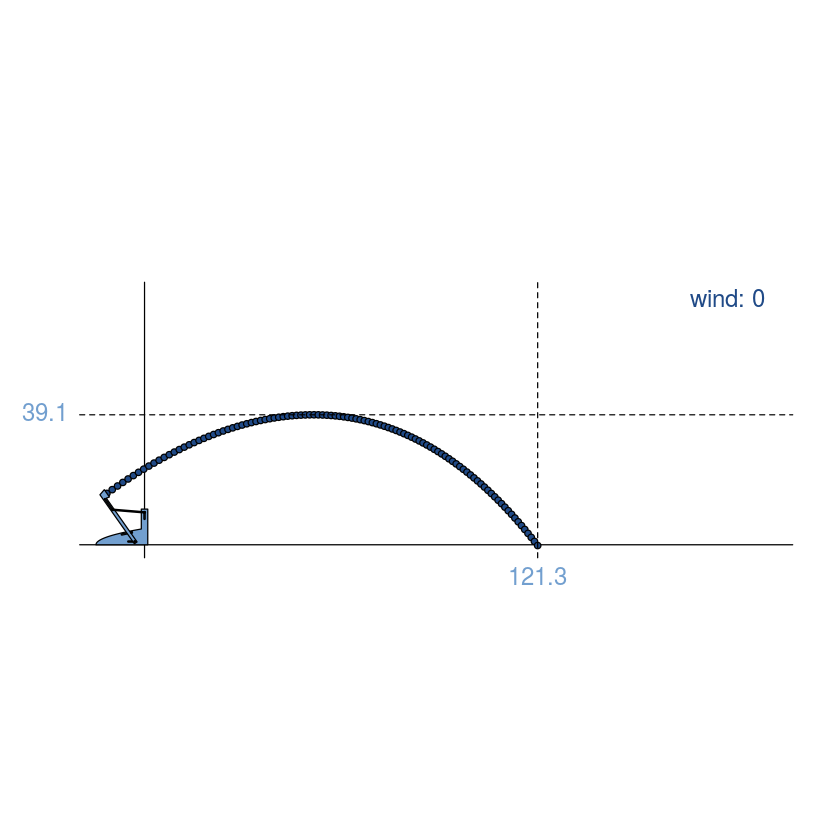


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -108.8281 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       108.83  |proj g|=       1.6619
At iterate     1  f =       105.96  |proj g|=       0.54765
At iterate     2  f =       105.46  |proj g|=        0.5508
At iterate     3  f =       105.12  |proj g|=        1.5356
At iterate     4  f =       104.92  |proj g|=       0.43809
At iterate     5  f =       104.52  |proj g|=        1.3791
At iterate     6  f =       104.24  |proj g|=        1.4987
At iterate     7  f =       104.19  |proj g|=       0.29874
At iterate     8  f =       104.18  |proj g|=      

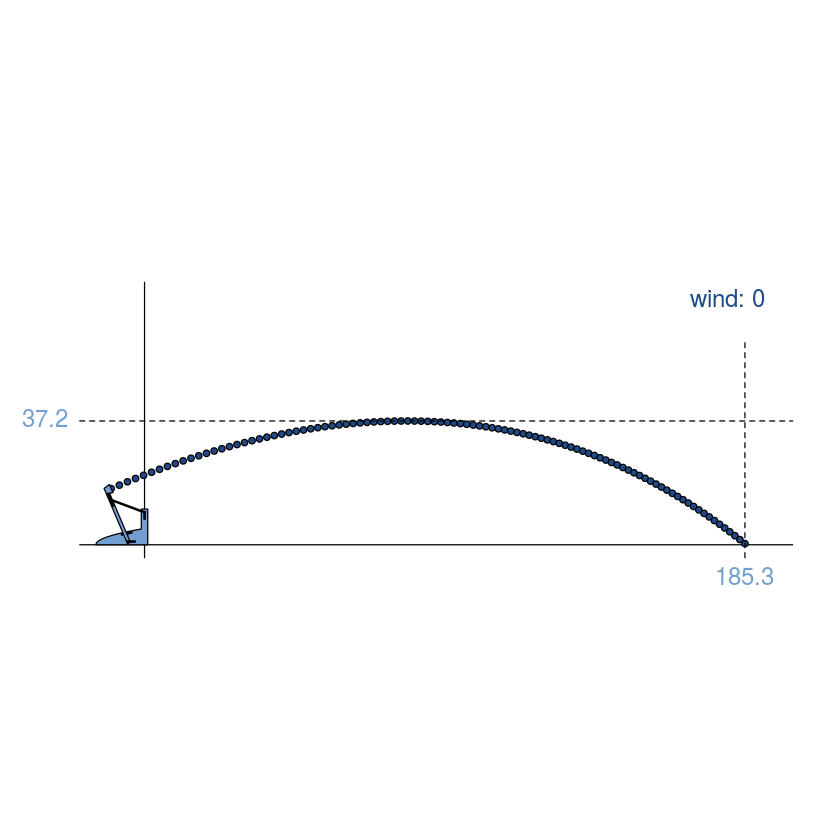


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -112.3058 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       112.31  |proj g|=       1.4266
At iterate     1  f =       110.44  |proj g|=        1.0115
At iterate     2  f =       107.66  |proj g|=       0.91712
At iterate     3  f =       107.27  |proj g|=        1.5354
At iterate     4  f =       106.45  |proj g|=        1.5332
At iterate     5  f =       105.82  |proj g|=       0.56301
At iterate     6  f =       105.64  |proj g|=        1.4941
At iterate     7  f =       105.42  |proj g|=        1.2219
At iterate     8  f =       105.39  |proj g|=      

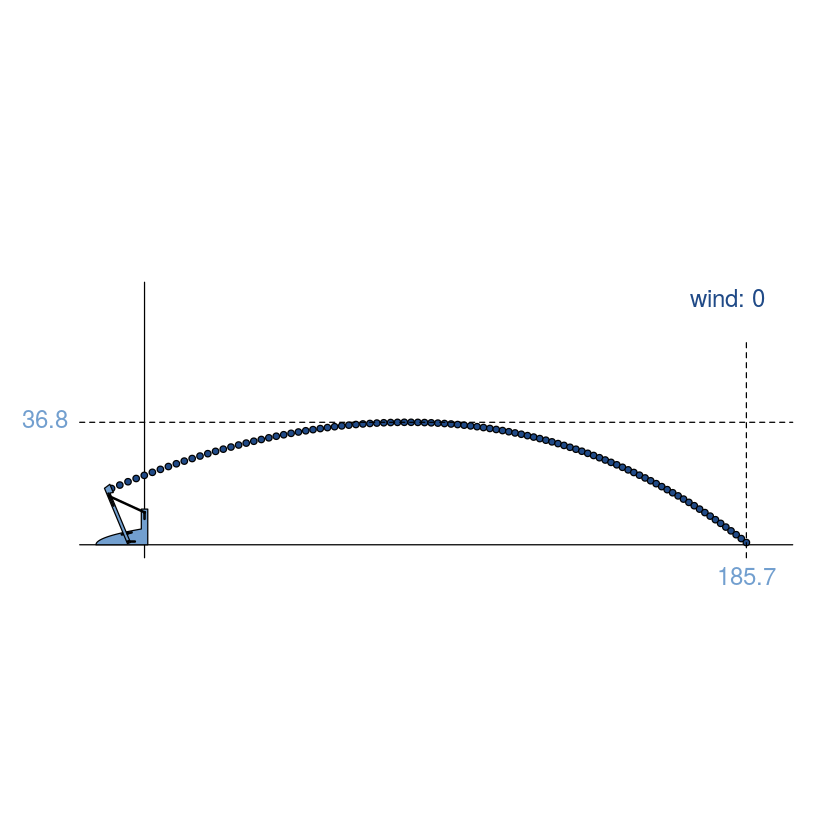


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -117.6666 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       117.67  |proj g|=       1.7013
At iterate     1  f =       117.48  |proj g|=       0.89043
At iterate     2  f =       114.09  |proj g|=       0.74902
At iterate     3  f =       112.57  |proj g|=       0.72541
At iterate     4  f =       110.14  |proj g|=        1.1984
At iterate     5  f =        109.4  |proj g|=        1.5073
At iterate     6  f =       109.19  |proj g|=       0.40402
At iterate     7  f =        109.1  |proj g|=       0.57517
At iterate     8  f =       108.97  |proj g|=      

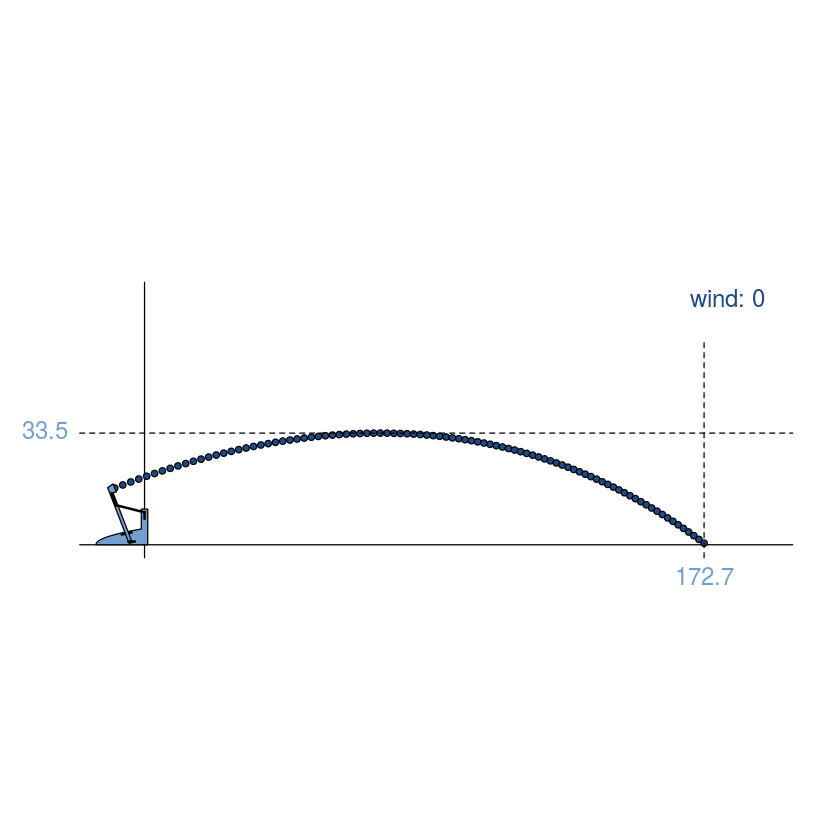


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -114.9164 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       114.92  |proj g|=       1.5966
At iterate     1  f =       113.51  |proj g|=       0.58466
At iterate     2  f =       112.93  |proj g|=        1.3527
At iterate     3  f =       111.98  |proj g|=       0.76023
At iterate     4  f =       111.91  |proj g|=       0.43431
At iterate     5  f =       111.81  |proj g|=        1.5006
At iterate     6  f =       111.73  |proj g|=        1.4997
At iterate     7  f =       111.65  |proj g|=       0.58445
At iterate     8  f =       111.63  |proj g|=      

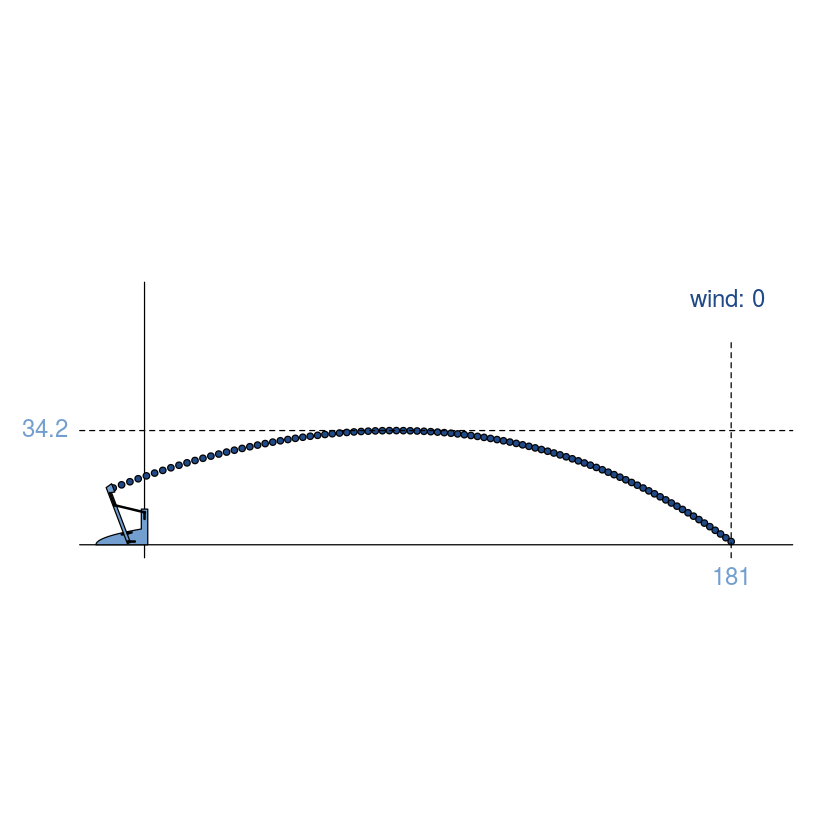


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -124.1765 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       124.18  |proj g|=       1.2419
At iterate     1  f =       119.99  |proj g|=        1.0814
At iterate     2  f =       116.63  |proj g|=        1.5825
At iterate     3  f =       115.67  |proj g|=        1.1651
At iterate     4  f =       115.17  |proj g|=        1.3893
At iterate     5  f =       114.35  |proj g|=        1.5112
At iterate     6  f =       114.16  |proj g|=        1.4935
At iterate     7  f =        113.9  |proj g|=        0.4959
At iterate     8  f =       113.78  |proj g|=      

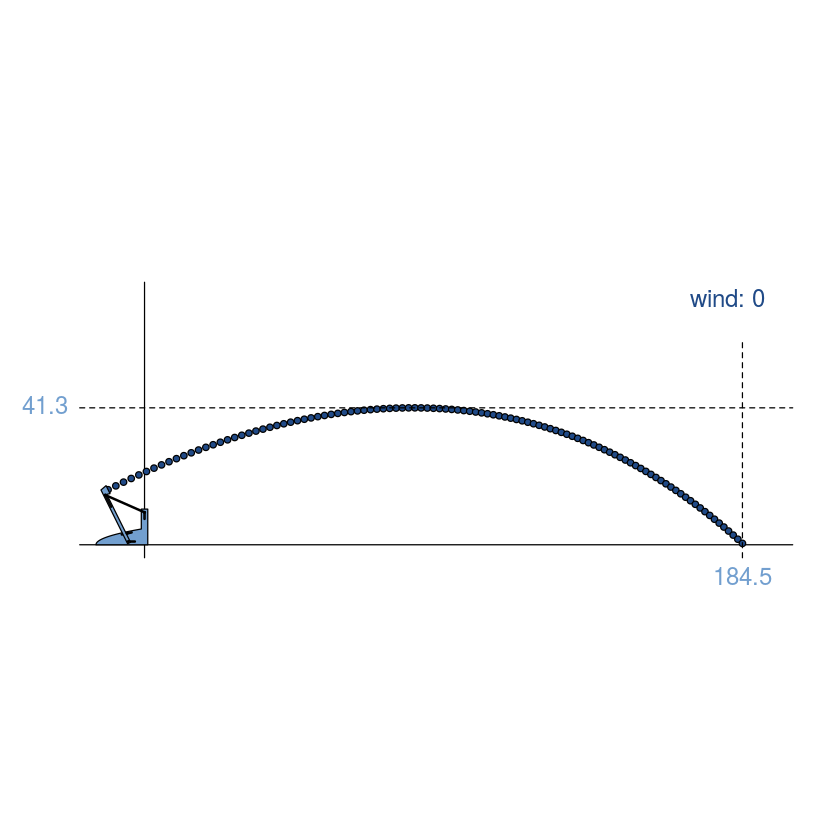


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -129.1136 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       129.11  |proj g|=       0.9355
At iterate     1  f =       120.79  |proj g|=        1.5301
At iterate     2  f =       119.53  |proj g|=       0.61127
At iterate     3  f =       118.16  |proj g|=       0.55356
At iterate     4  f =       117.71  |proj g|=        1.4851
At iterate     5  f =       117.47  |proj g|=        1.4708
At iterate     6  f =       117.43  |proj g|=       0.72967
At iterate     7  f =        117.4  |proj g|=       0.38345
At iterate     8  f =       117.34  |proj g|=      

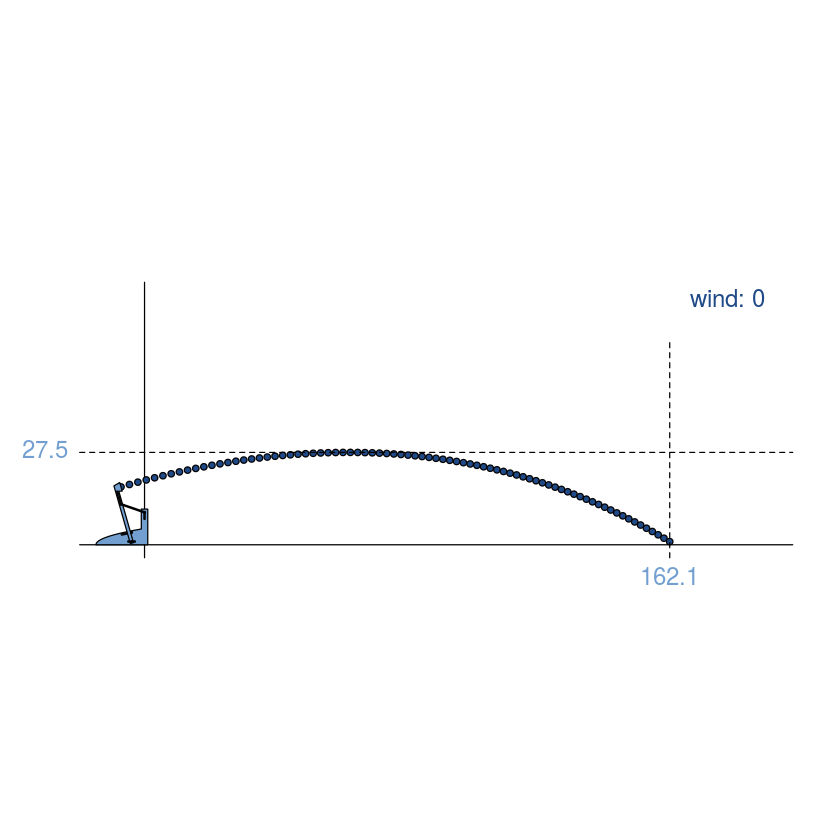


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -129.952 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       129.95  |proj g|=       1.6661
At iterate     1  f =       122.25  |proj g|=       0.64467
At iterate     2  f =        121.3  |proj g|=       0.62266
At iterate     3  f =       119.73  |proj g|=       0.55843
At iterate     4  f =       119.21  |proj g|=        1.4749
At iterate     5  f =       118.59  |proj g|=        1.4675
At iterate     6  f =       118.35  |proj g|=        1.3637
At iterate     7  f =       118.29  |proj g|=       0.39695
At iterate     8  f =       118.28  |proj g|=       

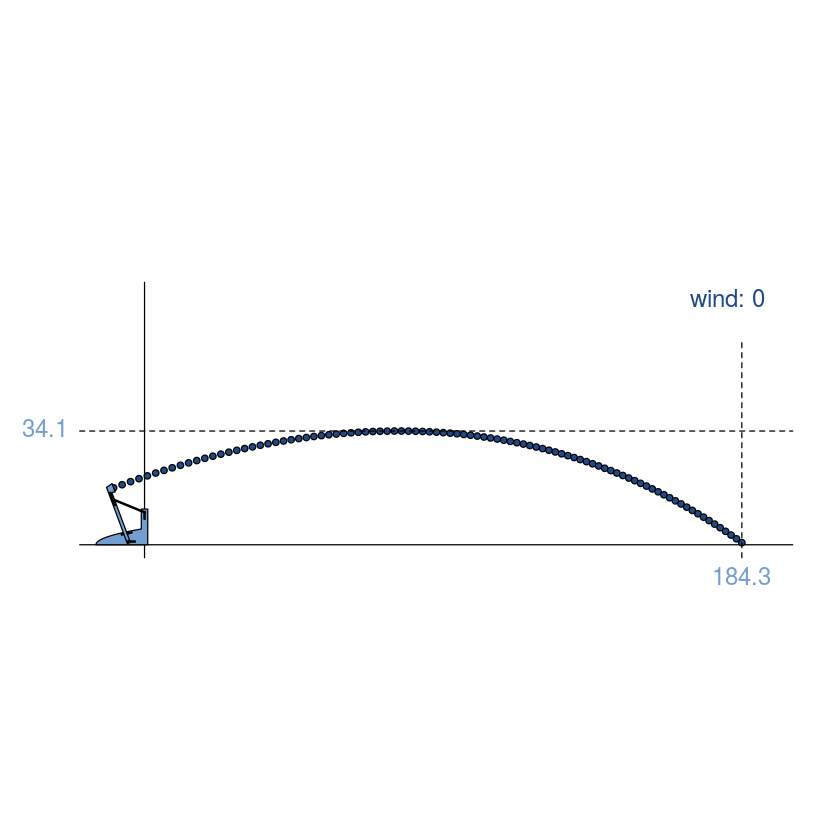


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -130.9798 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       130.98  |proj g|=       1.3653
At iterate     1  f =        128.8  |proj g|=        0.7242
At iterate     2  f =       122.96  |proj g|=         1.536
At iterate     3  f =        122.6  |proj g|=       0.58269
At iterate     4  f =       121.64  |proj g|=       0.55281
At iterate     5  f =        121.2  |proj g|=        1.4744
At iterate     6  f =       120.98  |proj g|=        1.4576
At iterate     7  f =       120.96  |proj g|=       0.64564
At iterate     8  f =       120.94  |proj g|=      

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


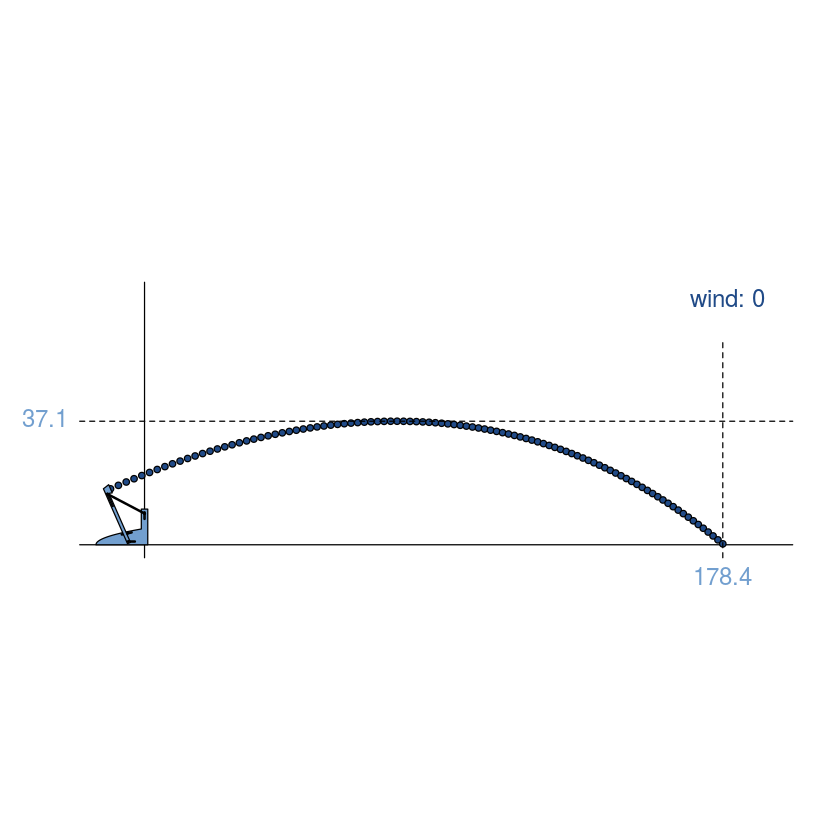


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 5.952798e-03

Parameters at the Solution (parameter, gradient):

 X[ 1] :	5.229348e-02	G[ 1] :	-1.560073e-07
 X[ 2] :	6.205137e-01	G[ 2] :	-9.953543e-08
 X[ 3] :	6.453704e-01	G[ 3] :	-6.232311e-08
 X[ 4] :	1.000000e+00	G[ 4] :	4.217717e-01

Solution Found Generation 11
Number of Generations Run 12

Thu Sep 16 13:45:48 2021
Total run time : 0 hours 0 minutes and 0 seconds


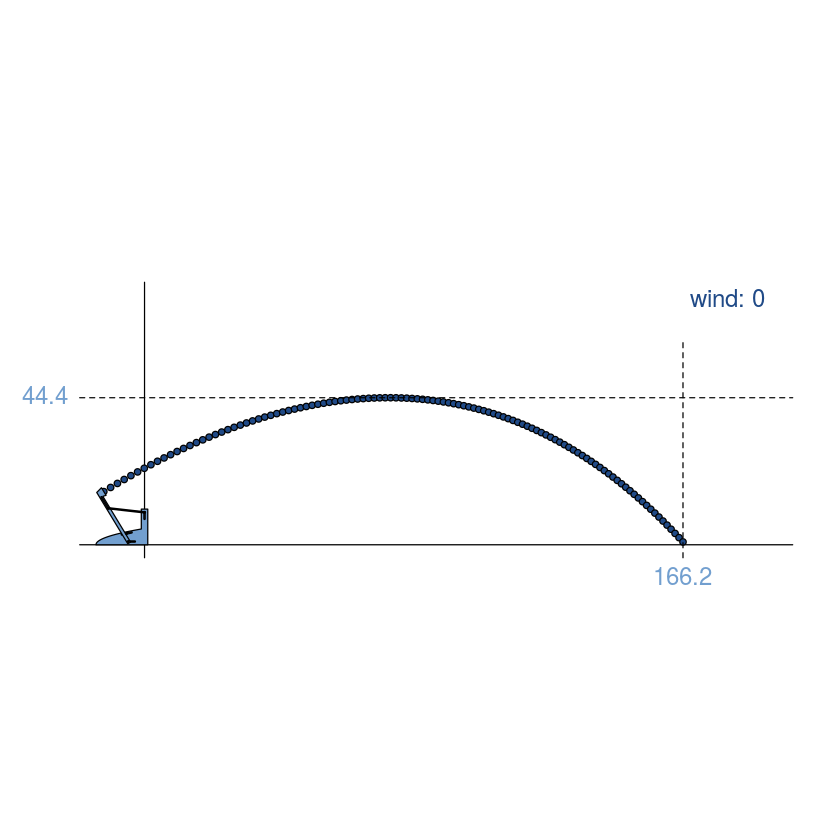


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -141.6744 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       141.67  |proj g|=       1.6079
At iterate     1  f =       137.86  |proj g|=       0.91475
At iterate     2  f =       130.11  |proj g|=       0.89865
At iterate     3  f =       129.12  |proj g|=        1.5318
At iterate     4  f =       126.64  |proj g|=        1.4187
At iterate     5  f =       125.74  |proj g|=        1.3541
At iterate     6  f =       125.62  |proj g|=       0.79822
At iterate     7  f =       125.38  |proj g|=       0.58844
At iterate     8  f =       125.15  |proj g|=      

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


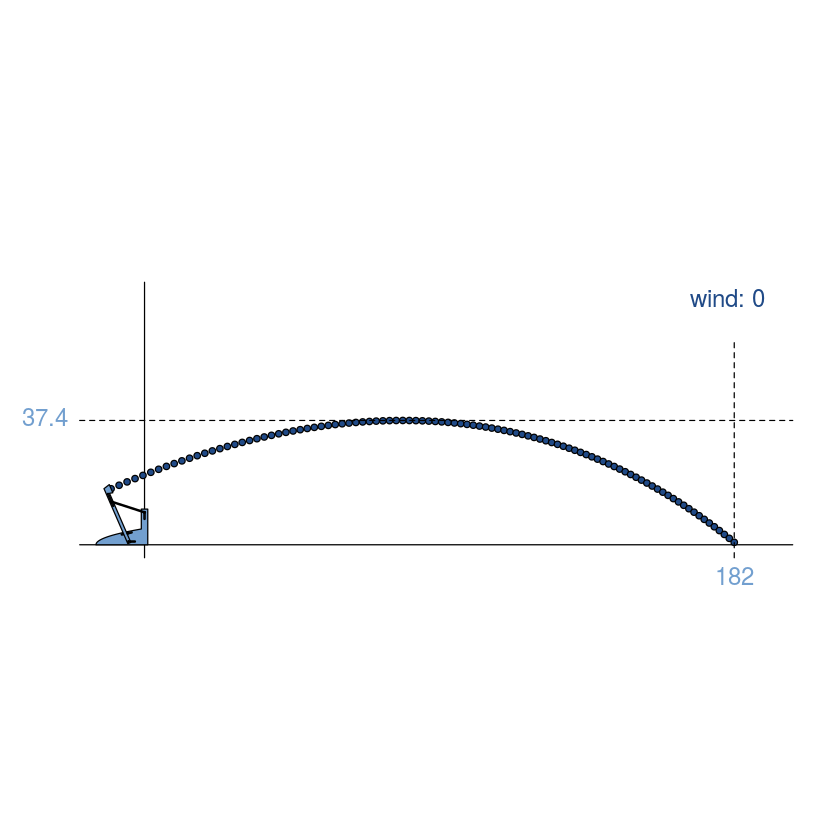


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 5.416654e-05

Parameters at the Solution (parameter, gradient):

 X[ 1] :	6.542039e-01	G[ 1] :	2.813288e-09
 X[ 2] :	1.000000e+00	G[ 2] :	1.692863e-03
 X[ 3] :	1.000000e+00	G[ 3] :	4.135223e-04
 X[ 4] :	0.000000e+00	G[ 4] :	-2.292337e-04

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 16 13:45:49 2021
Total run time : 0 hours 0 minutes and 0 seconds

optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -148.3306 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       148.33  |proj g|=       1.5048
At iterate     1  f =       142.9

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


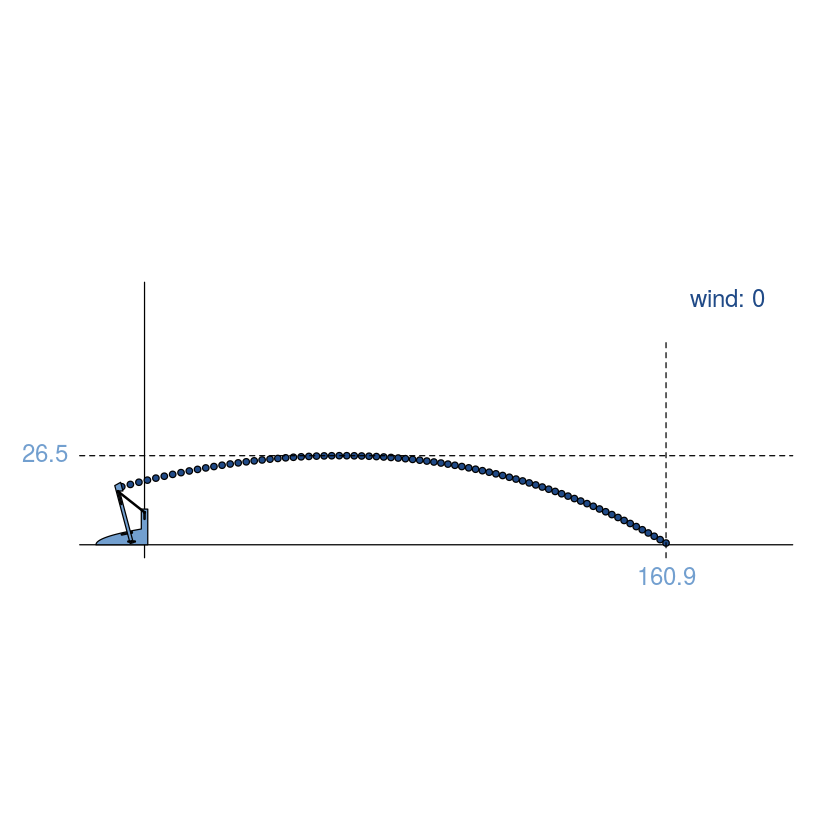


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 1.548313e-03

Parameters at the Solution (parameter, gradient):

 X[ 1] :	2.463692e-01	G[ 1] :	3.201178e-08
 X[ 2] :	7.506584e-01	G[ 2] :	-6.810951e-08
 X[ 3] :	3.890712e-01	G[ 3] :	-7.901234e-08
 X[ 4] :	1.000000e+00	G[ 4] :	8.136546e-02

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 16 13:45:50 2021
Total run time : 0 hours 0 minutes and 1 seconds


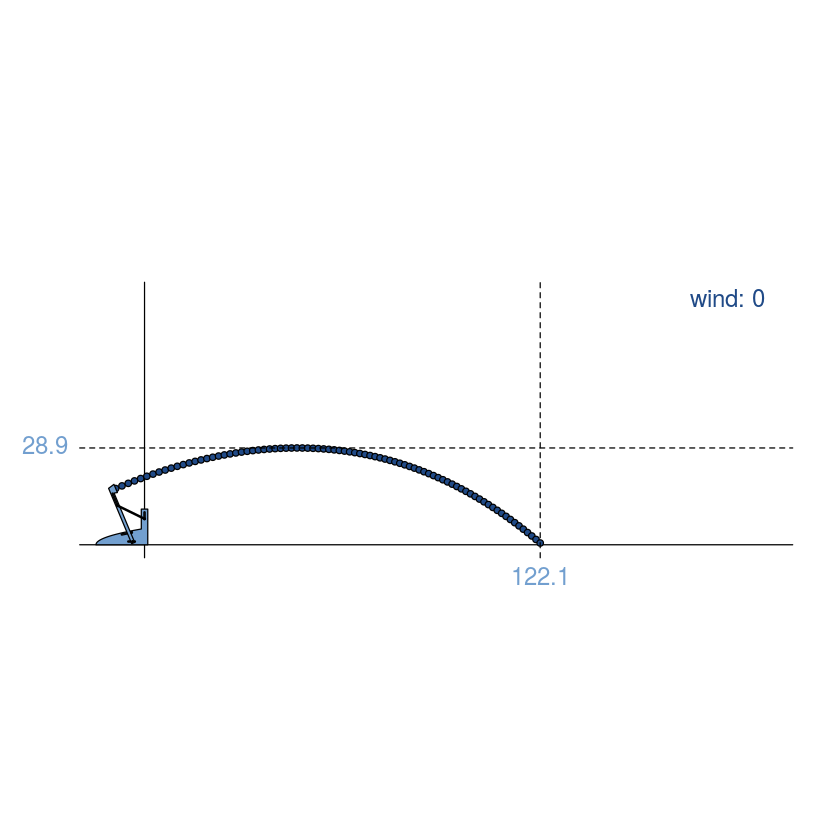


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.875968 1.83734 1.933866 1.914905 
  - best initial criterion value(s) :  -141.6444 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       141.64  |proj g|=      0.91395
At iterate     1  f =       140.42  |proj g|=       0.85953
At iterate     2  f =       137.82  |proj g|=        1.4871
At iterate     3  f =       136.42  |proj g|=        1.4712
At iterate     4  f =       134.57  |proj g|=       0.71185
At iterate     5  f =        134.5  |proj g|=       0.58738
At iterate     6  f =       134.36  |proj g|=        1.4508
At iterate     7  f =        134.2  |proj g|=        1.4538
At iterate     8  f =       134.06  |proj g|=      

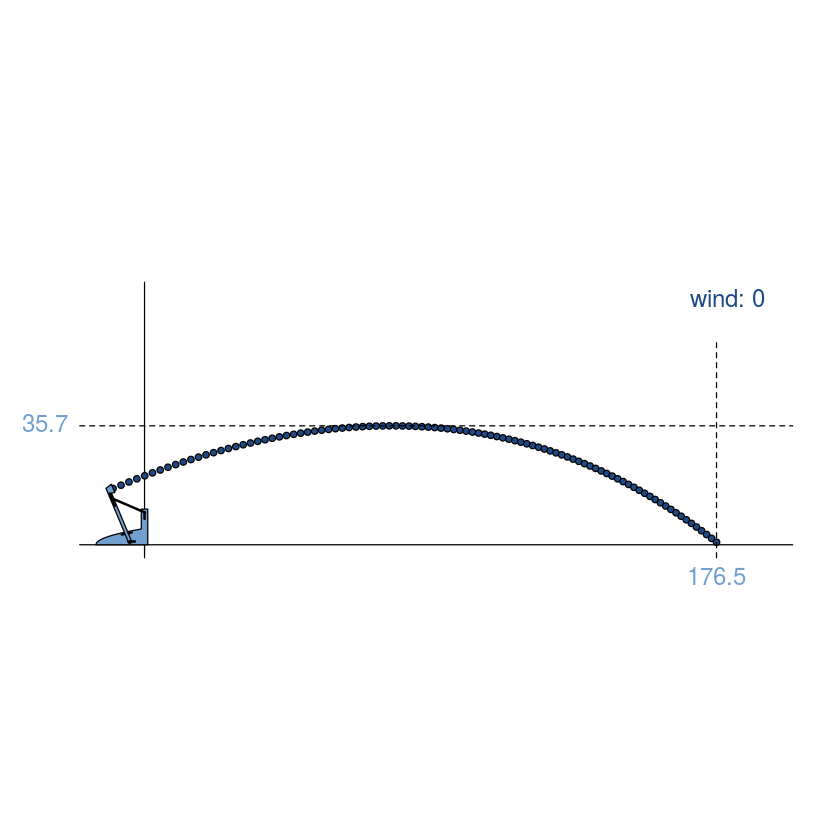

In [12]:
# Do a loop to automatize the process (for noise-free observations, you can also use EGO.nsteps)
nsteps <- 20
mGP <- mGP0
EGOpar <- matrix(NA, nrow = nsteps, ncol = d)
EGOvalue <- rep(NA, nsteps)
for (i in 1:nsteps){
    oEGO <- max_EI(model = mGP, lower = rep(0, d), upper = rep(1, d))
    newX <- EGOpar[i, ] <- oEGO$par
    newy <- EGOvalue[i] <- runExperimentFun(newX)
    mGP <- update(mGP, newX, newy)
}

bestIndex <- which.min(EGOvalue)
cat("longest shot observed:", - round(EGOvalue[bestIndex], 2),
    "\ncorresponding input values:", round(EGOpar[bestIndex, ], 2))


Global minimum found by EGO:

[1] 0.0000000 0.5951509 0.0000000 1.0000000

[1] -186.0374

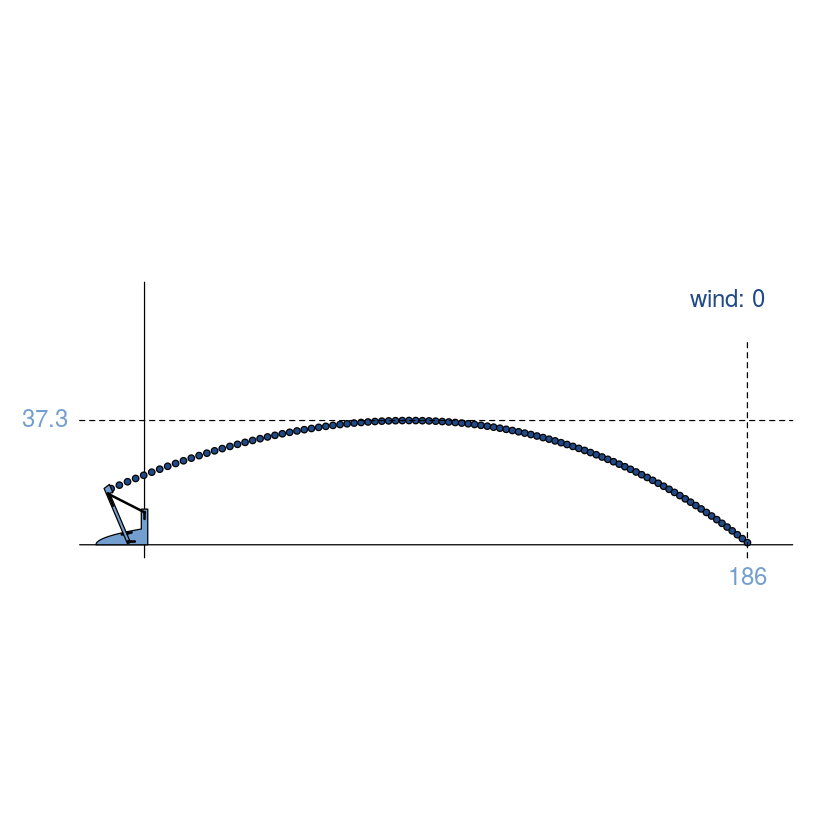

In [13]:
EGOpar[bestIndex, ]
runExperimentFun(EGOpar[bestIndex, ])

Let us visualize the 20 points computed with EGO in the X-Y space, and in time order.

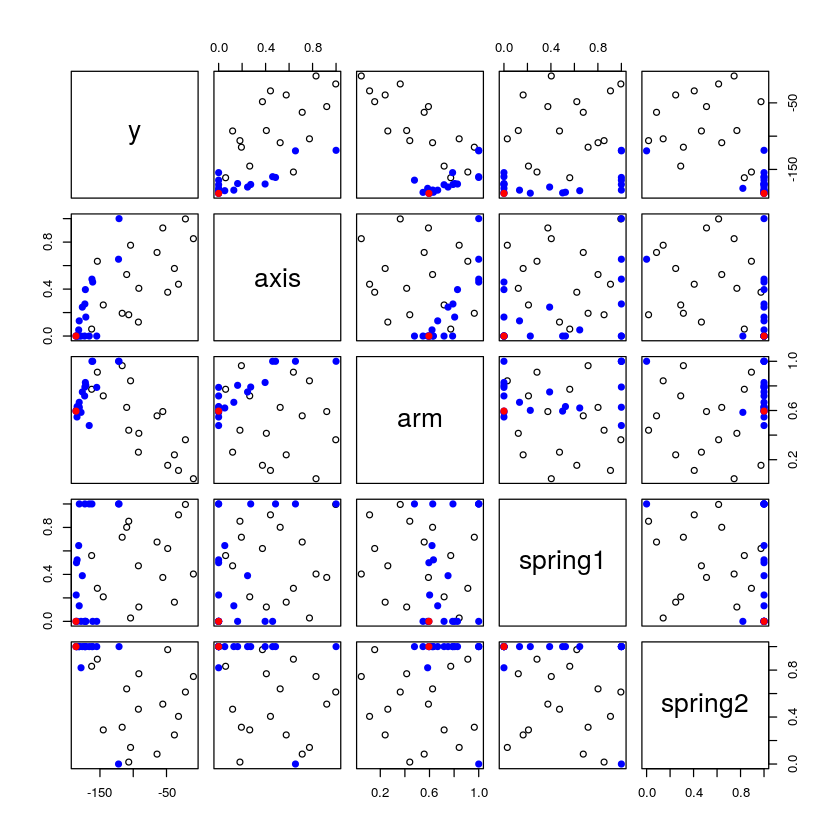

In [14]:
visualizeEGO <- function(initDesign, initValues, EGOpoints, EGOvalues){
  bestIndex <- which.min(EGOvalues)
  y <- c(initValues, EGOvalues, EGOvalues[bestIndex])
  X <- rbind(initDesign, EGOpoints, EGOpoints[bestIndex, ])
  nsteps <- nrow(EGOpoints)
  pairs(cbind(y, X), 
        col = c(rep("black", ninit), rep("blue", nsteps), "red"),
        pch = c(rep(1, ninit), rep(19, nsteps + 1)))
}

visualizeEGO(initDesign = X, initValues = Y,
             EGOpoints = EGOpar, EGOvalues = EGOvalue)

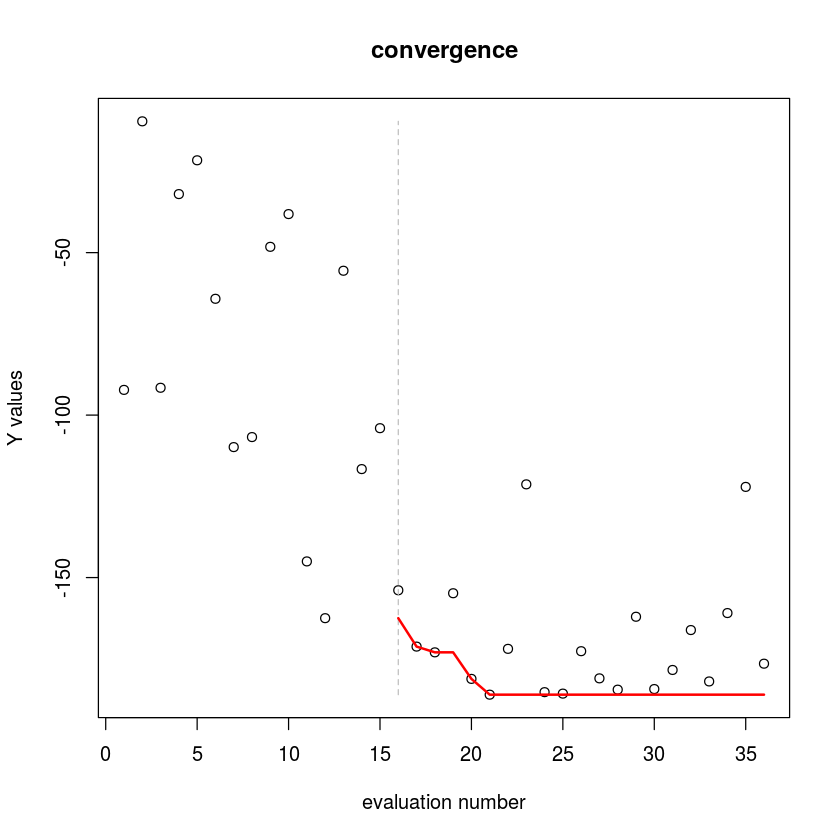

In [15]:
plot(c(Y, EGOvalue), main = "convergence", xlab = "evaluation number", ylab = "Y values")
lines(rep(ninit, 2), range(Y, EGOvalue), lty = 2, col = "gray")
lines(ninit + 0:nsteps, cummin(c(min(Y), EGOvalue)), col = "red", lwd = 2)

 Questions : 
 * *Why the EGO method would be much less efficient by using a linear model instead of a GP model?*
 * *Modify the code in order to deal with noisy observations, with the EQI criterion (mind using the argument 'noise.var' in 'km').*
 * *Investigate the influence: [a] of a trend in the model (change 'formula' in 'km'); [b] of a kernel; [c] of the initial sample size.*
 * *Adapt the EGO method in order to provide a batch of 2 points at one (function qEGO.nsteps), which is useful in practice, as the 2 runs of the time-consuming simulator can be done in parallel.*

Bonus : As the function is quick to evaluate, compare the result with the maximum value obtained with a standard optimizor (from library nloptr for instance). You can use the 'runExperimentFun' function defined above.